In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder
from tensorflow import keras

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
import kerastuner as kt
import keras_tuner
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

Using TensorFlow backend


In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [17]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [18]:
AouG = "Dwarfs"
NomeBase = "LamostMedium"

In [19]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [20]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s18_0029310   0.5697  0.7395  1.0306  1.0816  1.2142  1.3414   
iDR4_3_SPLUS-n01s18_0031529   0.4485  0.4875  1.0369  1.0755  1.3166  1.4603   
iDR4_3_SPLUS-n01s19_0045021   0.2409  0.5753  1.4396  1.6008  2.1291  2.3119   
iDR4_3_SPLUS-n01s19_0048485   0.2959  0.4969  1.2107  1.3305  1.7701  1.9611   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0170_0008897  0.3873  0.4174  0.8736  0.9431  1.1526  1.3089   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   
iDR4_3_STRIPE82-0170_0016094  0.3468  0.4039  1.0041  1.0735  1.3610  1.5564   
iDR4_3_STRIPE82-0170_0017644  0.3774  0.4183  0.9183  0.9962  1.2150  1.3873   
iDR4_3_STRIPE82-0170_0032934  0.3975  0.4614  0.9291  0.9973  1.1492  1.3892   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s18_0029310   1.3805  1.4101  1.3538  1.3980  ...   6256.60   
iDR4_3_SPLUS-n01s18_0031529   1.6504  1.6411  1.7357  1.7142  ...   5918.05   
iDR4_3_SPLUS-n01s19_0045021   2.7252  2.7748  2.8291  2.9344  ...   5172.47   
iDR4_3_SPLUS-n01s19_0048485   2.2367  2.3911  2.3327  2.5385  ...   5330.16   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0170_0008897  1.3910  1.5112  1.4360  1.5922  ...   5975.72   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   
iDR4_3_STRIPE82-0170_0016094  1.7664  1.7971  1.8866  1.8946  ...   5757.61   
iDR4_3_STRIPE82-0170_0017644  1.3895  1.5208  1.4651  1.6518  ...   6134.44   
iDR4_3_STRIPE82-0170_0032934  1.2730  1.3951  1.3613  1.6323  ...   5889.34   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s18_0029310      4.024    0.013        0.050     0.05791   
iDR4_3_SPLUS-n01s18_0031529      4.187   -0.236        0.044     0.05742   
iDR4_3_SPLUS-n01s19_0045021      4.443    0.165       -0.035    -0.02066   
iDR4_3_SPLUS-n01s19_0048485      4.514    0.016       -0.025    -0.04567   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0170_0008897     4.231   -0.276    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094     4.133   -0.116    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644     4.265    0.017    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0032934     4.232   -0.118    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s18_0029310     -0.03644     0.13123     0.09689     0.04636   
iDR4_3_SPLUS-n01s18_0031529      0.01974    -0.00685     0.06785     0.05026   
iDR4_3_SPLUS-n01s19_0045021     -0.00271     0.00595    -0.01282    -0.02333   
iDR4_3_SPLUS-n01s19_0048485      0.00883    -0.01612    -0.04371    -0.05951   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0170_0008897 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [21]:
xtrain = AnasCores.iloc[:, :66]

In [22]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [23]:
ytrain = AnasCores[columnYtrain]

In [24]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [25]:
#encoder.save_encoders()

In [26]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

##### Separando base para Treinamento da temperatura, logg e feh

In [27]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [28]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [29]:
X_train.shape

(10988, 66)

In [30]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n01s28_0027410    6063.95     4.185   -0.207        0.031   
iDR4_3_STRIPE82-0024_0031822   5576.48     4.122   -0.370        0.073   
iDR4_3_STRIPE82-0167_0039508   5747.31     4.251   -0.126        0.075   
iDR4_3_STRIPE82-0168_0006693   5856.16     4.307   -0.520        0.127   
iDR4_3_STRIPE82-0168_0020089   5580.99     4.368   -0.064       -0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n07s42_0030032    5566.79     4.174   -0.107        0.071   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n01s28_0008414    5686.33     4.270   -0.291        0.115   
iDR4_3_SPLUS-n02s28_0027128    4938.18     4.606   -0.399        0.193   
iDR4_3_STRIPE82-0026_0041109   4851.61     4.706   -0.087        0.018   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s28_0027410      0.07658    -0.05051     0.28575     0.04317   
iDR4_3_STRIPE82-0024_0031822     0.08247     0.09618    -0.02581     0.12445   
iDR4_3_STRIPE82-0167_0039508     0.00974     0.04711     0.32963     0.14010   
iDR4_3_STRIPE82-0168_0006693     0.19076     0.22787     0.24187     0.19415   
iDR4_3_STRIPE82-0168_0020089     0.03061    -0.03418     0.12399     0.00051   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n07s42_0030032      0.07072     0.05318     0.14909     0.13907   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0008414      0.12213     0.10049    -0.00155     0.17746   
iDR4_3_SPLUS-n02s28_0027128      0.02296     0.11759    -0.13340     0.30296   
iDR4_3_STRIPE82-0026_0041109    -0.04410     0.01418    -0.04872     0.02292   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-n01s28_0027410      0.01631    -0.02499     0.651959  
iDR4_3_STRIPE82-0024_0031822     0.03808     0.00131     0.256879  
iDR4_3_STRIPE82-0167_0039508     0.06904     0.04996     0.395332  
iDR4_3_STRIPE82-0168_0006693     0.10779    -0.01263     0.483551  
iDR4_3_STRIPE82-0168_0020089    -0.01324     0.00334     0.260534  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n07s42_0030032      0.06070     0.03388     0.249025  
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.307177  
iDR4_3_SPLUS-n01s28_0008414      0.10999     0.05849     0.345909  
iDR4_3_SPLUS-n02s28_0027128      0.13780     0.05591    -0.260445  
iDR4_3_STRIPE82-0026_0041109    -0.03344    -0.00094    -0.330607  

[10988 rows x 11 columns]

### Teff

In [54]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [55]:
modelTEFF = training_model()

In [56]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
4/4 - 1s - loss: 0.9269 - val_loss: 0.2192 - 626ms/epoch - 156ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2867 - val_loss: 0.3182 - 64ms/epoch - 16ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2696 - val_loss: 0.1923 - 67ms/epoch - 17ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.1910 - val_loss: 0.2069 - 62ms/epoch - 16ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2122 - val_loss: 0.1986 - 59ms/epoch - 15ms/step
Epoch 6/2000
4/4 - 0s - loss: 0.1906 - val_loss: 0.1811 - 60ms/epoch - 15ms/step
Epoch 7/2000
4/4 - 0s - loss: 0.1841 - val_loss: 0.1886 - 61ms/epoch - 15ms/step
Epoch 8/2000
4/4 - 0s - loss: 0.1870 - val_loss: 0.1809 - 60ms/epoch - 15ms/step
Epoch 9/2000
4/4 - 0s - loss: 0.1791 - val_loss: 0.1769 - 57ms/epoch - 14ms/step
Epoch 10/2000
4/4 - 0s - loss: 0.1791 - val_loss: 0.1787 - 58ms/epoch - 15ms/step
Epoch 11/2000
4/4 - 0s - loss: 0.1789 - val_loss: 0.1756 - 59ms/epoch - 15ms/step
Epoch 12/2000
4/4 - 0s - loss: 0.1763 - val_loss: 0.1758 - 55ms/epoch - 14ms/step
Epoch 13/2000
4/4 - 0s 

Text(0, 0.5, 'Loss')

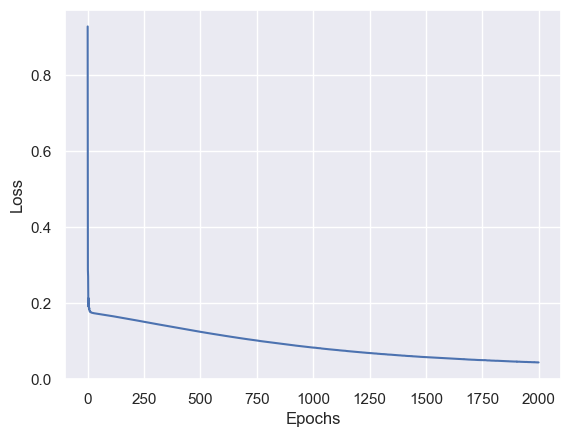

In [57]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

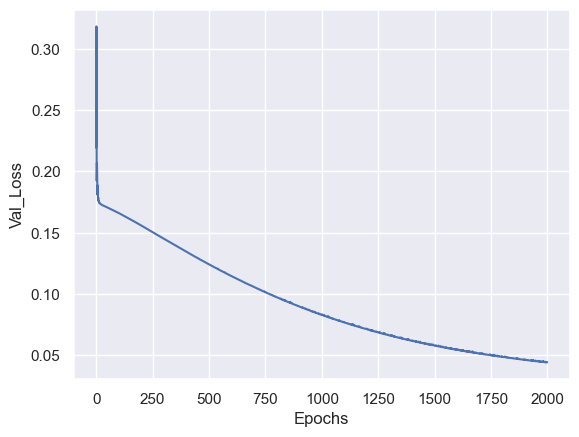

In [58]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [67]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Dwarfs.h5


In [62]:
predTeff = modelTEFF.predict(X_test)

96/96 [==============================] - 0s 1ms/step


In [63]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

In [64]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0013909           5661.442871  
iDR4_3_SPLUS-s02s24_0021190           5533.088379  
iDR4_3_STRIPE82-0026_0051692          5184.746094  
iDR4_3_STRIPE82-0026_0040987          5224.722656  
iDR4_3_SPLUS-n01s38_0001722           5723.327148  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758  
iDR4_3_STRIPE82-0101_0051898          5564.924805  
iDR4_3_STRIPE82-0026_0051498          5678.329102  
iDR4_3_STRIPE82-0024_0035879          5400.931152  
iDR4_3_SPLUS-n07s42_0032863           5124.907227  

[3053 rows x 12 columns]

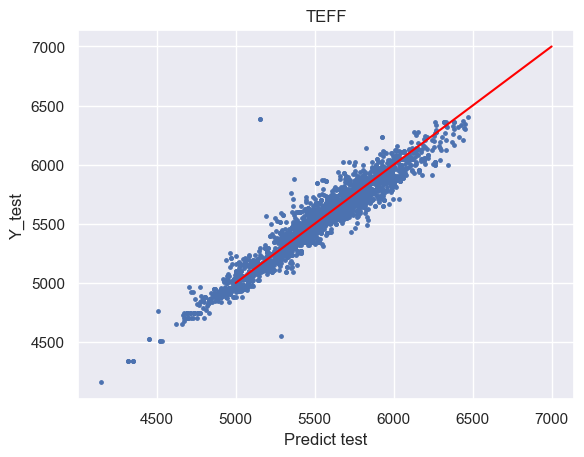

In [52]:
plt.scatter(Y_test['teff_cnn'], predTeff, s=6)
plt.title(Parametro)
#plt.xlim(5200, 6200)
#plt.ylim(5200, 6200)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

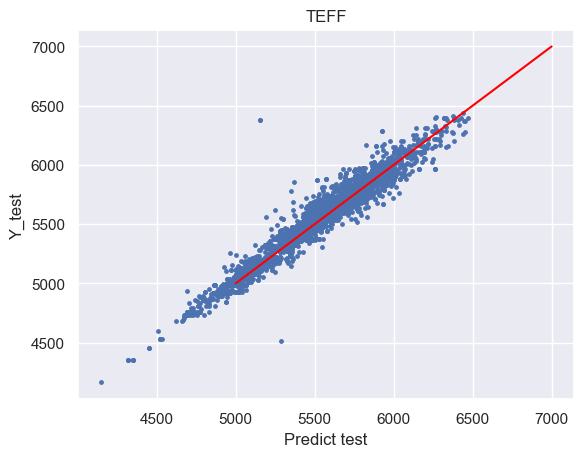

In [65]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(5200, 6200)
#plt.ylim(5200, 6200)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [66]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [68]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0013909           5661.442871  
iDR4_3_SPLUS-s02s24_0021190           5533.088379  
iDR4_3_STRIPE82-0026_0051692          5184.746094  
iDR4_3_STRIPE82-0026_0040987          5224.722656  
iDR4_3_SPLUS-n01s38_0001722           5723.327148  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758  
iDR4_3_STRIPE82-0101_0051898          5564.924805  
iDR4_3_STRIPE82-0026_0051498          5678.329102  
iDR4_3_STRIPE82-0024_0035879          5400.931152  
iDR4_3_SPLUS-n07s42_0032863           5124.907227  

[3053 rows x 12 columns]

In [48]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [69]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [70]:
modelLOGG = training_model()

In [71]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000


4/4 - 1s - loss: 11.2926 - val_loss: 6.2109 - 722ms/epoch - 180ms/step
Epoch 2/5000
4/4 - 0s - loss: 4.6641 - val_loss: 2.4700 - 60ms/epoch - 15ms/step
Epoch 3/5000
4/4 - 0s - loss: 2.1496 - val_loss: 1.8018 - 60ms/epoch - 15ms/step
Epoch 4/5000
4/4 - 0s - loss: 1.9493 - val_loss: 1.7022 - 77ms/epoch - 19ms/step
Epoch 5/5000
4/4 - 0s - loss: 1.5865 - val_loss: 1.0350 - 56ms/epoch - 14ms/step
Epoch 6/5000
4/4 - 0s - loss: 0.9279 - val_loss: 0.6357 - 54ms/epoch - 14ms/step
Epoch 7/5000
4/4 - 0s - loss: 0.6401 - val_loss: 0.5875 - 59ms/epoch - 15ms/step
Epoch 8/5000
4/4 - 0s - loss: 0.5924 - val_loss: 0.5192 - 62ms/epoch - 16ms/step
Epoch 9/5000
4/4 - 0s - loss: 0.4814 - val_loss: 0.3874 - 57ms/epoch - 14ms/step
Epoch 10/5000
4/4 - 0s - loss: 0.3819 - val_loss: 0.3554 - 57ms/epoch - 14ms/step
Epoch 11/5000
4/4 - 0s - loss: 0.3540 - val_loss: 0.3187 - 57ms/epoch - 14ms/step
Epoch 12/5000
4/4 - 0s - loss: 0.3141 - val_loss: 0.3025 - 56ms/epoch - 14ms/step
Epoch 13/5000
4/4 - 0s - loss: 0.30

Text(0, 0.5, 'Loss')

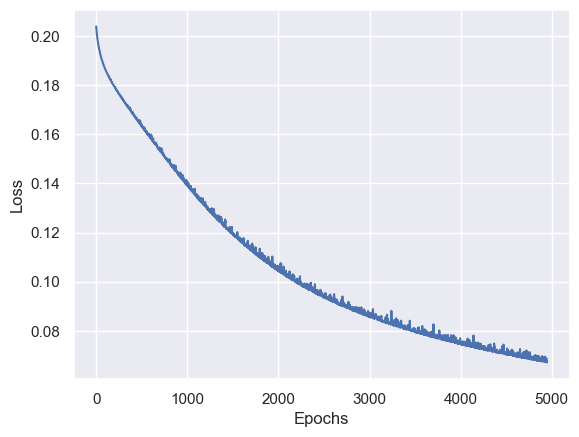

In [72]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

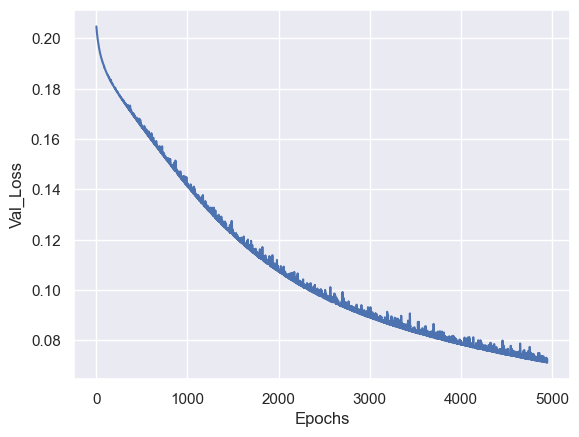

In [73]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [81]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Dwarfs.h5


In [75]:
predlogg = modelLOGG.predict(X_test)

 1/96 [..............................] - ETA: 6s

96/96 [==============================] - 0s 2ms/step


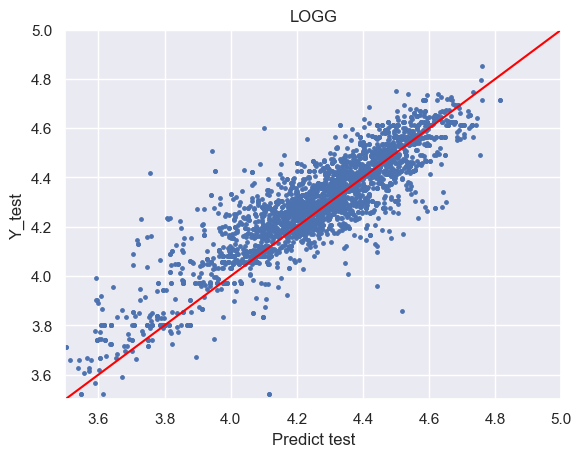

In [83]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.5, 5)
plt.ylim(3.5, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [84]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [78]:
Y_test['LOGG_Predict'] = predlogg

In [79]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n07s42_0013909           5661.442871      4.462332  
iDR4_3_SPLUS-s02s24_0021190           5533.088379      4.133078  
iDR4_3_STRIPE82-0026_0051692          5184.746094      4.359337  
iDR4_3_STRIPE82-0026_0040987          5224.722656      4.454075  
iDR4_3_SPLUS-n01s38_0001722           5723.327148      3.992266  
...                                           ...           ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758      4.284736  
iDR4_3_STRIPE82-0101_0051898          5564.924805      4.128642  
iDR4_3_STRIPE82-0026_0051498          5678.329102      4.404918  
iDR4_3_STRIPE82-0024_0035879          5400.931152      4.392253  
iDR4_3_SPLUS-n07s42_0032863           5124.907227      4.525121  

[3053 rows x 13 columns]

In [80]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [85]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [88]:
modelFEH = training_model()

In [89]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2500


4/4 - 1s - loss: 0.2756 - val_loss: 0.2352 - 664ms/epoch - 166ms/step
Epoch 2/2500
4/4 - 0s - loss: 0.2241 - val_loss: 0.2083 - 66ms/epoch - 17ms/step
Epoch 3/2500
4/4 - 0s - loss: 0.2055 - val_loss: 0.1969 - 58ms/epoch - 15ms/step
Epoch 4/2500
4/4 - 0s - loss: 0.1991 - val_loss: 0.1920 - 58ms/epoch - 15ms/step
Epoch 5/2500
4/4 - 0s - loss: 0.1925 - val_loss: 0.1893 - 64ms/epoch - 16ms/step
Epoch 6/2500
4/4 - 0s - loss: 0.1893 - val_loss: 0.1879 - 58ms/epoch - 15ms/step
Epoch 7/2500
4/4 - 0s - loss: 0.1870 - val_loss: 0.1849 - 61ms/epoch - 15ms/step
Epoch 8/2500
4/4 - 0s - loss: 0.1851 - val_loss: 0.1835 - 59ms/epoch - 15ms/step
Epoch 9/2500
4/4 - 0s - loss: 0.1840 - val_loss: 0.1820 - 59ms/epoch - 15ms/step
Epoch 10/2500
4/4 - 0s - loss: 0.1826 - val_loss: 0.1809 - 54ms/epoch - 14ms/step
Epoch 11/2500
4/4 - 0s - loss: 0.1815 - val_loss: 0.1799 - 59ms/epoch - 15ms/step
Epoch 12/2500
4/4 - 0s - loss: 0.1807 - val_loss: 0.1794 - 59ms/epoch - 15ms/step
Epoch 13/2500
4/4 - 0s - loss: 0.180

Text(0, 0.5, 'Loss')

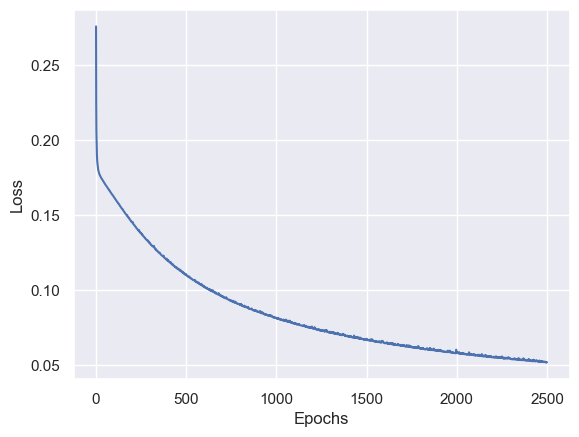

In [90]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

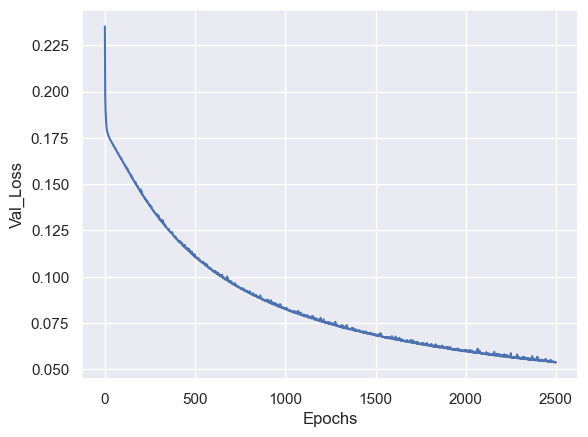

In [91]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [99]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Dwarfs.h5


In [93]:
predfeh = modelFEH.predict(X_test)

 1/96 [..............................] - ETA: 6s

96/96 [==============================] - 0s 2ms/step


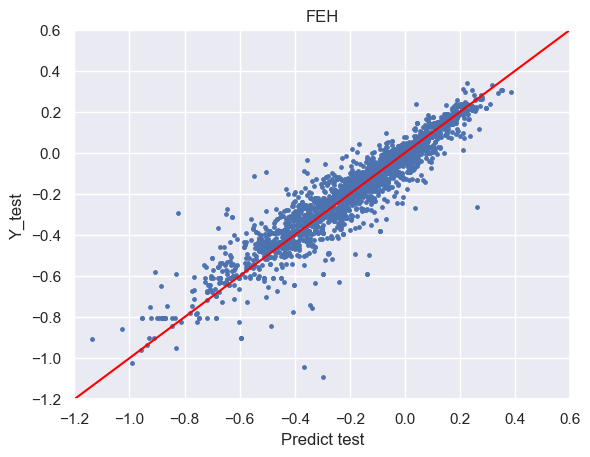

In [94]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [95]:
score = r2_score(Y_test['feh_cnn'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 89.0%


In [96]:
Y_test['FEH_Predict'] = predfeh

In [97]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0013909    5563.73     4.532   -0.521        0.204   
iDR4_3_SPLUS-s02s24_0021190    5457.56     4.244   -0.166        0.054   
iDR4_3_STRIPE82-0026_0051692   5216.83     4.322    0.044        0.008   
iDR4_3_STRIPE82-0026_0040987   5221.83     4.363   -0.208        0.011   
iDR4_3_SPLUS-n01s38_0001722    5995.33     4.152   -0.407        0.045   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5574.30     4.290   -0.110        0.100   
iDR4_3_STRIPE82-0101_0051898   5537.87     4.013   -0.345    -9999.000   
iDR4_3_STRIPE82-0026_0051498   5621.20     4.325   -0.384    -9999.000   
iDR4_3_STRIPE82-0024_0035879   5466.89     4.494   -0.328        0.050   
iDR4_3_SPLUS-n07s42_0032863    5091.47     4.444   -0.381        0.141   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0013909      0.11193     0.17945     0.04516     0.30684   
iDR4_3_SPLUS-s02s24_0021190     -0.01187     0.05532     0.12000     0.10536   
iDR4_3_STRIPE82-0026_0051692     0.02246     0.02696     0.08235     0.06782   
iDR4_3_STRIPE82-0026_0040987    -0.02669     0.16285    -0.03204    -0.00884   
iDR4_3_SPLUS-n01s38_0001722      0.05853     0.02013     0.32216     0.08602   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06492     0.07390     0.08853     0.17413   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0035879     0.02960     0.05338    -0.07892     0.09842   
iDR4_3_SPLUS-n07s42_0032863      0.04907     0.13685    -0.09997     0.21501   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0013909      0.19352     0.01262     0.246545   
iDR4_3_SPLUS-s02s24_0021190      0.04240     0.04222     0.160498   
iDR4_3_STRIPE82-0026_0051692     0.04685     0.04148    -0.034607   
iDR4_3_STRIPE82-0026_0040987    -0.03448    -0.02229    -0.030555   
iDR4_3_SPLUS-n01s38_0001722      0.05450     0.05494     0.596345   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.08066     0.06765     0.255112   
iDR4_3_STRIPE82-0101_0051898 -9999.00000 -9999.00000     0.225587   
iDR4_3_STRIPE82-0026_0051498 -9999.00000 -9999.00000     0.293123   
iDR4_3_STRIPE82-0024_0035879     0.04341    -0.03017     0.168059   
iDR4_3_SPLUS-n07s42_0032863      0.10919     0.05015    -0.136208   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n07s42_0013909           5661.442871      4.462332    -0.450319  
iDR4_3_SPLUS-s02s24_0021190           5533.088379      4.133078    -0.169534  
iDR4_3_STRIPE82-0026_0051692          5184.746094      4.359337     0.079410  
iDR4_3_STRIPE82-0026_0040987          5224.722656      4.454075    -0.188479  
iDR4_3_SPLUS-n01s38_0001722           5723.327148      3.992266    -0.776093  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0028_0033168          5597.551758      4.284736    -0.120741  
iDR4_3_STRIPE82-0101_0051898          5564.924805      4.128642    -0.265312  
iDR4_3_STRIPE82-0026_0051498          5678.329102      4.404918    -0.392208  
iDR4_3_STRIPE82-0024_0035879          5400.931152      4.392253    -0.457887  
iDR4_3_SPLUS-n07s42_0032863           5124.907227      4.525121    -0.290345  

[3053 rows x 14 columns]

In [98]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [100]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [101]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s18_0029310   0.5697  0.7395  1.0306  1.0816  1.2142  1.3414   
iDR4_3_SPLUS-n01s18_0031529   0.4485  0.4875  1.0369  1.0755  1.3166  1.4603   
iDR4_3_SPLUS-n01s19_0045021   0.2409  0.5753  1.4396  1.6008  2.1291  2.3119   
iDR4_3_SPLUS-n01s19_0048485   0.2959  0.4969  1.2107  1.3305  1.7701  1.9611   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0170_0008897  0.3873  0.4174  0.8736  0.9431  1.1526  1.3089   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   
iDR4_3_STRIPE82-0170_0016094  0.3468  0.4039  1.0041  1.0735  1.3610  1.5564   
iDR4_3_STRIPE82-0170_0017644  0.3774  0.4183  0.9183  0.9962  1.2150  1.3873   
iDR4_3_STRIPE82-0170_0032934  0.3975  0.4614  0.9291  0.9973  1.1492  1.3892   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s18_0029310   1.3805  1.4101  1.3538  1.3980  ...   6256.60   
iDR4_3_SPLUS-n01s18_0031529   1.6504  1.6411  1.7357  1.7142  ...   5918.05   
iDR4_3_SPLUS-n01s19_0045021   2.7252  2.7748  2.8291  2.9344  ...   5172.47   
iDR4_3_SPLUS-n01s19_0048485   2.2367  2.3911  2.3327  2.5385  ...   5330.16   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0170_0008897  1.3910  1.5112  1.4360  1.5922  ...   5975.72   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   
iDR4_3_STRIPE82-0170_0016094  1.7664  1.7971  1.8866  1.8946  ...   5757.61   
iDR4_3_STRIPE82-0170_0017644  1.3895  1.5208  1.4651  1.6518  ...   6134.44   
iDR4_3_STRIPE82-0170_0032934  1.2730  1.3951  1.3613  1.6323  ...   5889.34   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s18_0029310      4.024    0.013        0.050     0.05791   
iDR4_3_SPLUS-n01s18_0031529      4.187   -0.236        0.044     0.05742   
iDR4_3_SPLUS-n01s19_0045021      4.443    0.165       -0.035    -0.02066   
iDR4_3_SPLUS-n01s19_0048485      4.514    0.016       -0.025    -0.04567   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0170_0008897     4.231   -0.276    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094     4.133   -0.116    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644     4.265    0.017    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0032934     4.232   -0.118    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s18_0029310     -0.03644     0.13123     0.09689     0.04636   
iDR4_3_SPLUS-n01s18_0031529      0.01974    -0.00685     0.06785     0.05026   
iDR4_3_SPLUS-n01s19_0045021     -0.00271     0.00595    -0.01282    -0.02333   
iDR4_3_SPLUS-n01s19_0048485      0.00883    -0.01612    -0.04371    -0.05951   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0170_0008897 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0016094 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0170_0017644 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [102]:
AnasCoresParams = AnasCores.loc[AnasCores['alpha_m_cnn'] != -9999]

In [103]:
print('cfe =', AnasCoresParams['c_fe'].min())
print('cafe = ', AnasCoresParams['ca_fe'].min())
print('nfe = ', AnasCoresParams['n_fe'].min())
print('mgfe = ', AnasCoresParams['mg_fe'].min())
print('sife = ', AnasCoresParams['si_fe'].min())
print('nife = ', AnasCoresParams['ni_fe'].min())

cfe = -0.24814
cafe =  -0.45868
nfe =  -0.28011
mgfe =  -0.29935
sife =  -0.17489
nife =  -0.2868


In [104]:
xtrain = AnasCoresParams.iloc[:, :66]

In [105]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [106]:
ytrain = AnasCoresParams[columnYtrain]

In [107]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [108]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [109]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [110]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

### Alpha

In [124]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [125]:
modelAlpha = training_model()

In [126]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2202 - val_loss: 0.1792 - 694ms/epoch - 139ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1789 - val_loss: 0.1811 - 130ms/epoch - 26ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1739 - val_loss: 0.1752 - 105ms/epoch - 21ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1735 - val_loss: 0.1693 - 95ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1702 - val_loss: 0.1705 - 73ms/epoch - 15ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1696 - 74ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1681 - 100ms/epoch - 20ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1682 - val_loss: 0.1681 - 87ms/epoch - 17ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1677 - val_loss: 0.1680 - 77ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1675 - val_loss: 0.1674 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1672 - val_loss: 0.1671 - 72ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1669 - val_loss: 0.1669 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

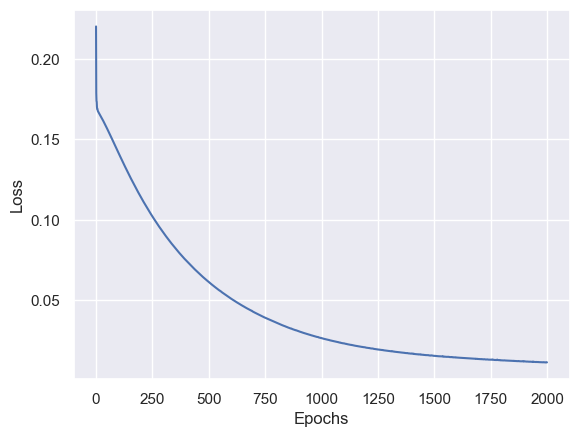

In [127]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

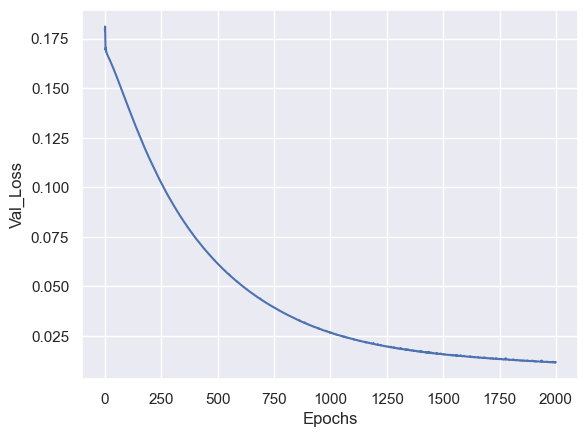

In [128]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [129]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Dwarfs.h5


In [130]:
predalpha = modelAlpha.predict(X_test)

20/83 [======>.......................] - ETA: 0s

83/83 [==============================] - 0s 2ms/step


In [131]:
predalpha

array([[ 0.1260602 ],
       [-0.03897374],
       [-0.01564852],
       ...,
       [ 0.06708889],
       [-0.00159837],
       [-0.00360062]], dtype=float32)

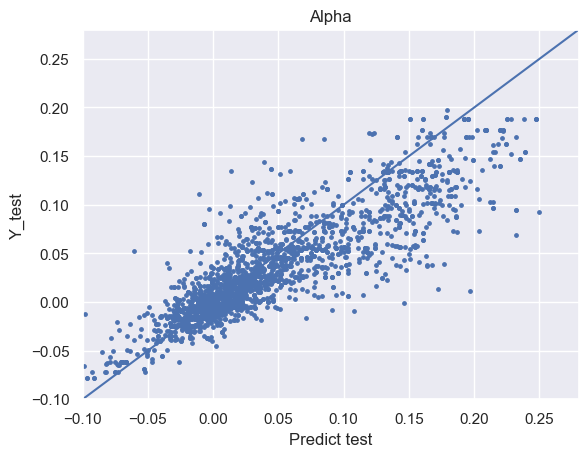

In [132]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [133]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [134]:
Y_test['alpha_predict'] = predalpha

In [135]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060  
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974  
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649  
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388  
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635  
...                               ...            ...  
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005  
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604  
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089  
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598  
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601  

[2649 rows x 11 columns]

In [136]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [151]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [152]:
modelCFE = training_model()

In [153]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2015 - val_loss: 0.1783 - 596ms/epoch - 119ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1779 - val_loss: 0.1756 - 59ms/epoch - 12ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1739 - val_loss: 0.1711 - 59ms/epoch - 12ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1714 - val_loss: 0.1695 - 56ms/epoch - 11ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1702 - val_loss: 0.1687 - 59ms/epoch - 12ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1692 - val_loss: 0.1683 - 64ms/epoch - 13ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1686 - val_loss: 0.1681 - 63ms/epoch - 13ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1681 - val_loss: 0.1677 - 58ms/epoch - 12ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1677 - val_loss: 0.1674 - 63ms/epoch - 13ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1674 - val_loss: 0.1670 - 59ms/epoch - 12ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1670 - val_loss: 0.1668 - 58ms/epoch - 12ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1667 - val_loss: 0.1665 - 60ms/epoch - 12ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.166

Text(0, 0.5, 'Loss')

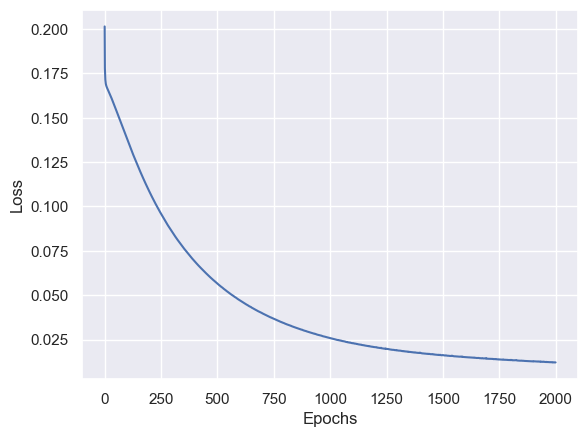

In [154]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

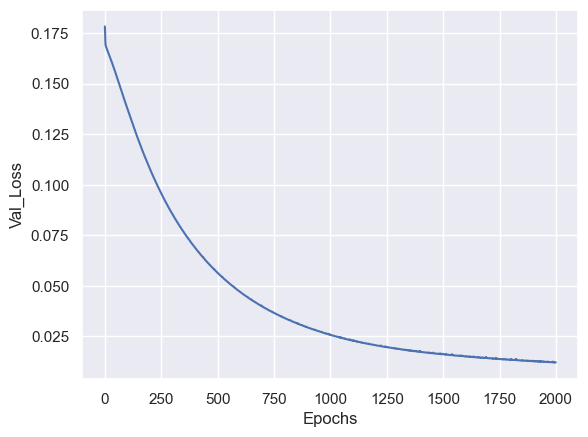

In [155]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [156]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Dwarfs.h5


In [157]:
predCFE = modelCFE.predict(X_test)

83/83 [==============================] - 0s 2ms/step


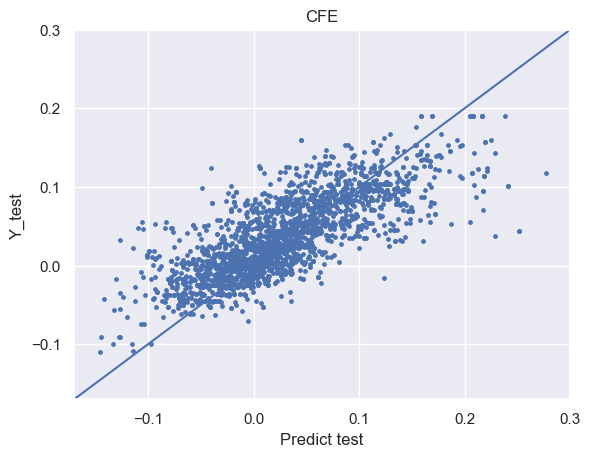

In [158]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [159]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 59.0%


In [160]:
Y_test['CFE_predict'] = predCFE

In [161]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220  
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316  
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217  
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438  
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317  
...                               ...            ...          ...  
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792  
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396  
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104  
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565  
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576  

[2649 rows x 12 columns]

In [162]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [163]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [164]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [165]:
modelCAFE = training_model()

In [166]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.2442 - val_loss: 0.1755 - 672ms/epoch - 134ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1893 - val_loss: 0.1782 - 92ms/epoch - 18ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1779 - val_loss: 0.1813 - 100ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1743 - val_loss: 0.1767 - 97ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1737 - val_loss: 0.1712 - 78ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1721 - val_loss: 0.1696 - 77ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1704 - val_loss: 0.1699 - 75ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1696 - val_loss: 0.1698 - 65ms/epoch - 13ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1692 - val_loss: 0.1693 - 65ms/epoch - 13ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1688 - val_loss: 0.1688 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1685 - val_loss: 0.1684 - 69ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1683 - val_loss: 0.1681 - 70ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.16

Text(0, 0.5, 'Loss')

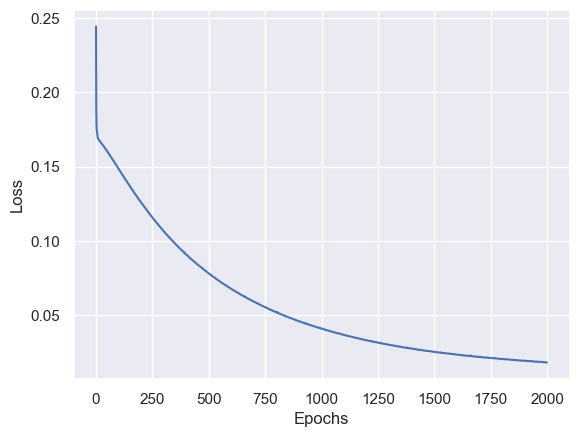

In [167]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

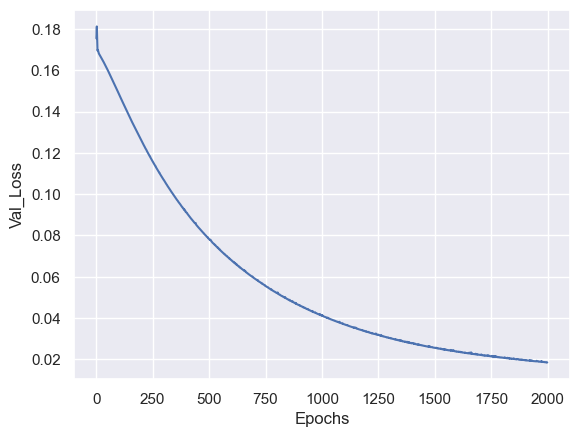

In [168]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [169]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Dwarfs.h5


In [170]:
predCAFE = modelCAFE.predict(X_test)

 1/83 [..............................] - ETA: 6s

83/83 [==============================] - 0s 2ms/step


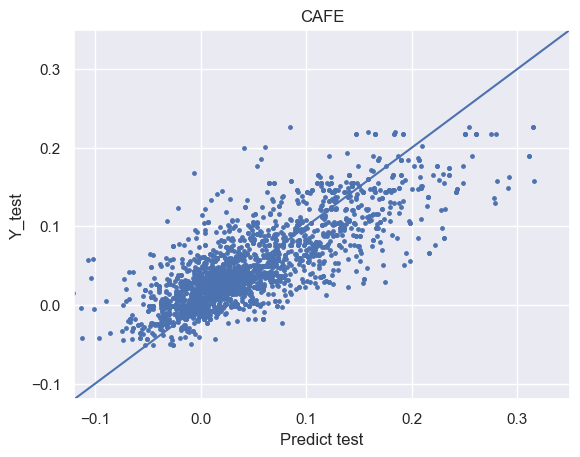

In [171]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [172]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 62.0%


In [173]:
Y_test['CAFE_predict'] = predCAFE

In [174]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0053664      0.132131  
iDR4_3_SPLUS-n06s43_0003986      -0.002348  
iDR4_3_STRIPE82-0163_0043210     -0.019196  
iDR4_3_STRIPE82-0024_0038417      0.016748  
iDR4_3_STRIPE82-0026_0055783      0.021921  
...                                    ...  
iDR4_3_STRIPE82-0026_0051498      0.063414  
iDR4_3_SPLUS-n06s42_0038341       0.087263  
iDR4_3_SPLUS-n07s42_0020791       0.057837  
iDR4_3_STRIPE82-0026_0047510      0.040375  
iDR4_3_STRIPE82-0026_0046410      0.007714  

[2649 rows x 13 columns]

In [175]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [176]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [177]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [178]:
modelNFE = training_model()

In [179]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.4012 - val_loss: 0.2487 - 679ms/epoch - 136ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.2046 - val_loss: 0.2024 - 94ms/epoch - 19ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.2003 - val_loss: 0.1846 - 96ms/epoch - 19ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1887 - val_loss: 0.1855 - 93ms/epoch - 19ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1803 - val_loss: 0.1794 - 79ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1804 - val_loss: 0.1776 - 78ms/epoch - 16ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1783 - val_loss: 0.1782 - 77ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1772 - val_loss: 0.1757 - 71ms/epoch - 14ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1764 - val_loss: 0.1752 - 71ms/epoch - 14ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1759 - val_loss: 0.1753 - 69ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1755 - val_loss: 0.1748 - 66ms/epoch - 13ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1752 - val_loss: 0.1746 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.175

Text(0, 0.5, 'Loss')

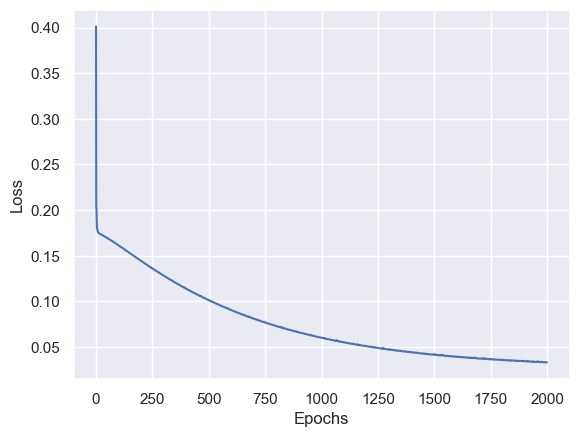

In [180]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

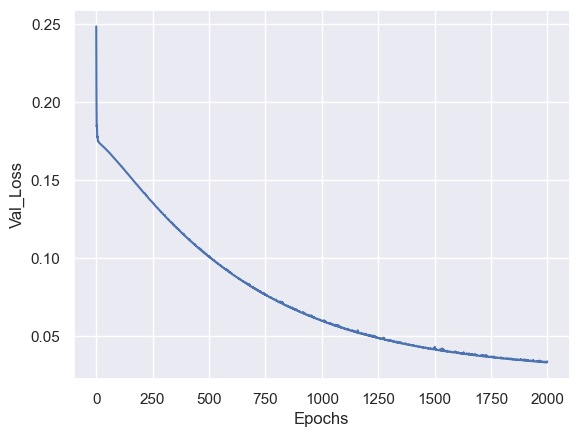

In [181]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [182]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Dwarfs.h5


In [183]:
predNFE = modelNFE.predict(X_test)

 1/83 [..............................] - ETA: 5s

83/83 [==============================] - 0s 2ms/step


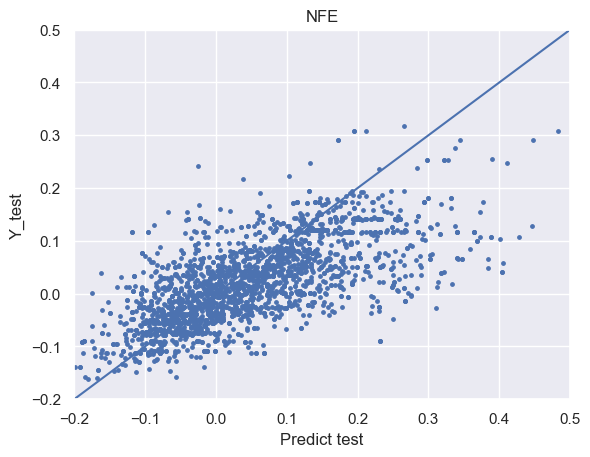

In [184]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [185]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 41.0%


In [186]:
Y_test['NFE_predict'] = predNFE

In [187]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247  
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618  
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867  
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503  
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240  
...                                    ...          ...  
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273  
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667  
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273  
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617  
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567  

[2649 rows x 14 columns]

In [188]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [189]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [190]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [191]:
modelMGFE = training_model()

In [192]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.1924 - val_loss: 0.1746 - 617ms/epoch - 123ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1774 - val_loss: 0.1752 - 106ms/epoch - 21ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1745 - val_loss: 0.1738 - 101ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1725 - val_loss: 0.1719 - 105ms/epoch - 21ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1712 - val_loss: 0.1712 - 81ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1704 - val_loss: 0.1704 - 78ms/epoch - 16ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1699 - val_loss: 0.1698 - 71ms/epoch - 14ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1694 - val_loss: 0.1692 - 69ms/epoch - 14ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1690 - val_loss: 0.1689 - 72ms/epoch - 14ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1686 - val_loss: 0.1687 - 80ms/epoch - 16ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1683 - val_loss: 0.1682 - 77ms/epoch - 15ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1679 - val_loss: 0.1679 - 72ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

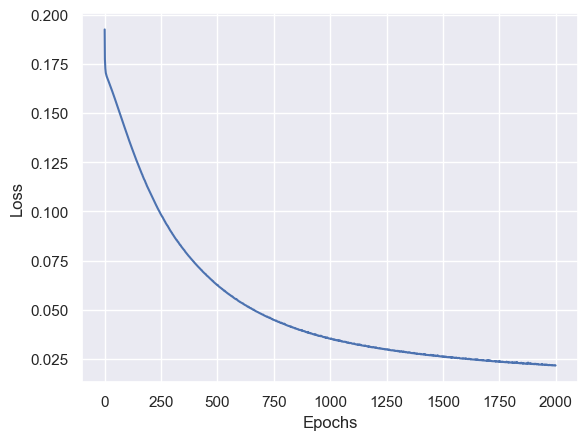

In [193]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

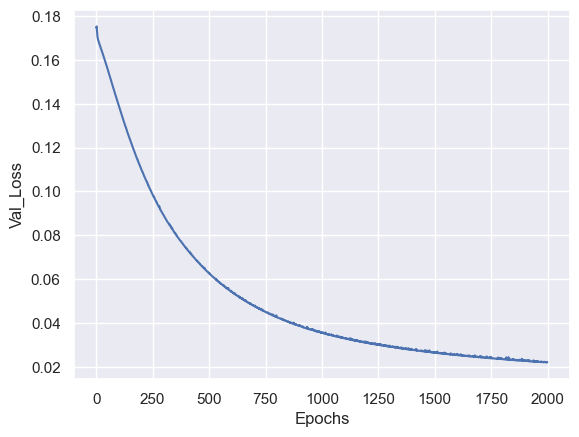

In [194]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [195]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Dwarfs.h5


In [196]:
predMGFE = modelMGFE.predict(X_test)

 1/83 [..............................] - ETA: 5s

83/83 [==============================] - 0s 2ms/step


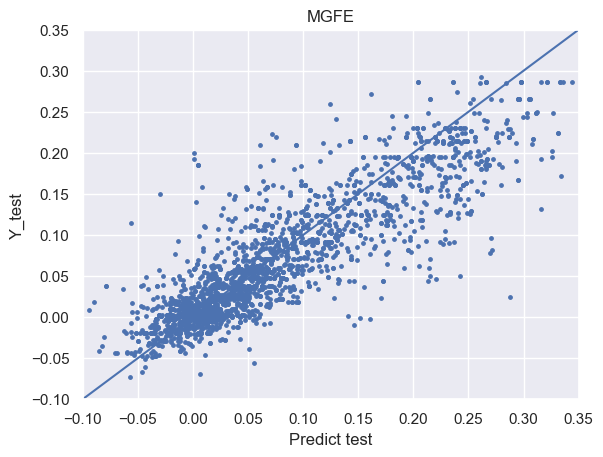

In [197]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [198]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


In [199]:
Y_test['MGFE_predict'] = predMGFE

In [200]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843  
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361  
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039  
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072  
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055  
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901  
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415  
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971  
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385  

[2649 rows x 15 columns]

In [201]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [202]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [203]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [204]:
modelSIFE = training_model()

In [205]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.5843 - val_loss: 0.1966 - 658ms/epoch - 132ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.2463 - val_loss: 0.2497 - 106ms/epoch - 21ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.2113 - val_loss: 0.1731 - 101ms/epoch - 20ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1788 - val_loss: 0.1884 - 81ms/epoch - 16ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1855 - val_loss: 0.1747 - 81ms/epoch - 16ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1719 - val_loss: 0.1710 - 73ms/epoch - 15ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1725 - val_loss: 0.1729 - 123ms/epoch - 25ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1716 - val_loss: 0.1694 - 78ms/epoch - 16ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1695 - val_loss: 0.1699 - 76ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1700 - val_loss: 0.1693 - 77ms/epoch - 15ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1691 - val_loss: 0.1688 - 72ms/epoch - 14ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1689 - val_loss: 0.1688 - 69ms/epoch - 14ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

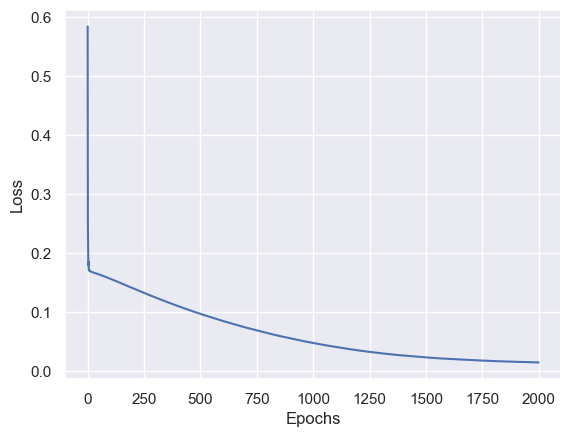

In [206]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

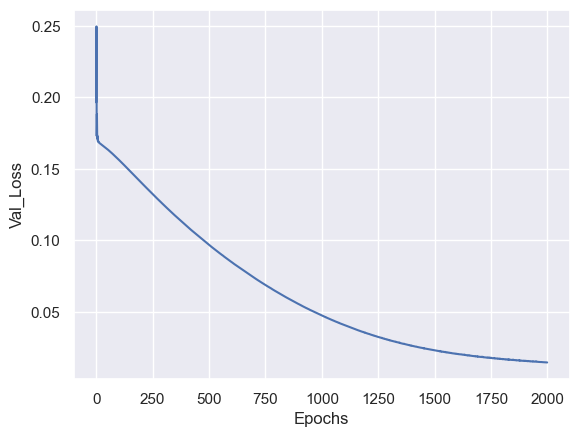

In [207]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [208]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Dwarfs.h5


In [209]:
predSIFE = modelSIFE.predict(X_test)

83/83 [==============================] - 0s 2ms/step


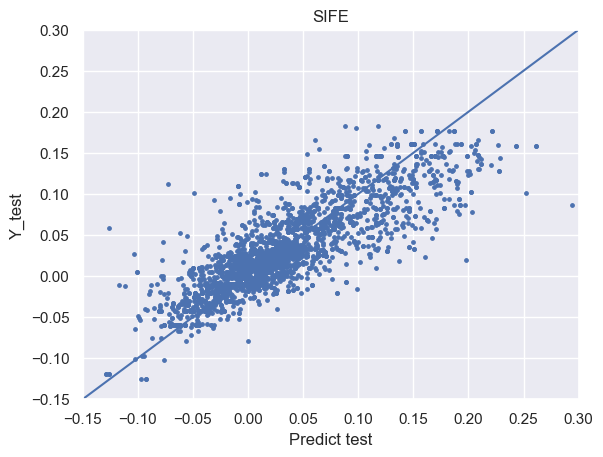

In [210]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [211]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 69.0%


In [212]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [213]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843   
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361   
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039   
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072   
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055   
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901   
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415   
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971   
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0053664      0.127683  
iDR4_3_SPLUS-n06s43_0003986      -0.022084  
iDR4_3_STRIPE82-0163_0043210      0.0

In [214]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [215]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [216]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0048604   5359.53     4.272    0.148       -0.024   
iDR4_3_STRIPE82-0005_0040108   5865.02     4.405   -0.373        0.166   
iDR4_3_SPLUS-n01s28_0002171    5694.21     4.450   -0.125        0.006   
iDR4_3_SPLUS-n08s41_0032664    5393.15     4.468   -0.091       -0.017   
iDR4_3_STRIPE82-0026_0052341   5981.15     4.446   -0.110       -0.014   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s41_0026773    5674.05     4.329   -0.310        0.075   
iDR4_3_STRIPE82-0130_0038386   5604.81     4.417   -0.327        0.023   
iDR4_3_SPLUS-n01s25_0034872    5663.81     4.158   -0.201        0.037   
iDR4_3_STRIPE82-0026_0033038   5799.64     4.286   -0.011        0.013   
iDR4_3_STRIPE82-0026_0041507   5953.93     4.048   -0.047        0.014   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0048604  0.00288 -0.01517  0.10300 -0.00356  0.02062   
iDR4_3_STRIPE82-0005_0040108  0.11422  0.10603  0.30473  0.25309  0.16169   
iDR4_3_SPLUS-n01s28_0002171  -0.02449  0.01026 -0.02352  0.02043 -0.00455   
iDR4_3_SPLUS-n08s41_0032664  -0.04315  0.02249 -0.06629 -0.00533 -0.05243   
iDR4_3_STRIPE82-0026_0052341 -0.07540  0.00477  0.16883 -0.02481  0.00078   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s41_0026773   0.04525  0.04404 -0.06016  0.11391  0.07444   
iDR4_3_STRIPE82-0130_0038386 -0.00843  0.01492 -0.00219  0.02588  0.03613   
iDR4_3_SPLUS-n01s25_0034872   0.07670  0.03822  0.23675  0.07967  0.01824   
iDR4_3_STRIPE82-0026_0033038 -0.01141 -0.00267  0.17860  0.03779  0.04259   
iDR4_3_STRIPE82-0026_0041507  0.01260  0.00284 -0.10037  0.02001  0.03281   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0048604  0.04664  
iDR4_3_STRIPE82-0005_0040108  0.03483  
iDR4_3_SPLUS-n01s28_0002171  -0.00264  
iDR4_3_SPLUS-n08s41_0032664  -0.04318  
iDR4_3_STRIPE82-0026_0052341  0.03985  
...                               ...  
iDR4_3_SPLUS-n06s41_0026773   0.05320  
iDR4_3_STRIPE82-0130_0038386 -0.00222  
iDR4_3_SPLUS-n01s25_0034872   0.02744  
iDR4_3_STRIPE82-0026_0033038  0.00284  
iDR4_3_STRIPE82-0026_0041507  0.02803  

[9532 rows x 10 columns]

In [217]:
modelNIFE = training_model()

In [218]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


5/5 - 1s - loss: 0.1886 - val_loss: 0.1708 - 650ms/epoch - 130ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1722 - val_loss: 0.1700 - 112ms/epoch - 22ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1694 - val_loss: 0.1686 - 105ms/epoch - 21ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1684 - val_loss: 0.1675 - 73ms/epoch - 15ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1674 - val_loss: 0.1672 - 72ms/epoch - 14ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1668 - val_loss: 0.1667 - 99ms/epoch - 20ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1664 - val_loss: 0.1661 - 76ms/epoch - 15ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1660 - val_loss: 0.1659 - 80ms/epoch - 16ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1657 - val_loss: 0.1656 - 74ms/epoch - 15ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1654 - val_loss: 0.1652 - 70ms/epoch - 14ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1651 - val_loss: 0.1649 - 65ms/epoch - 13ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1648 - val_loss: 0.1647 - 64ms/epoch - 13ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

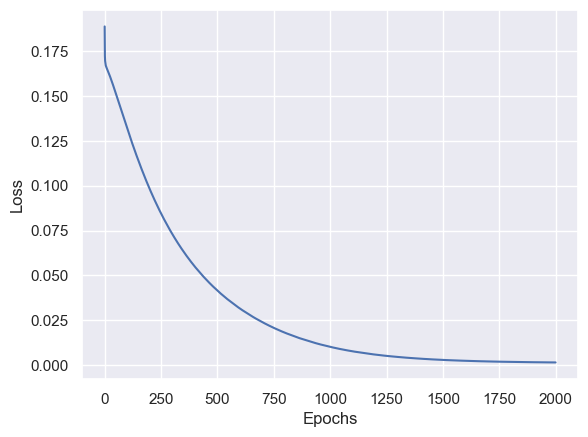

In [219]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

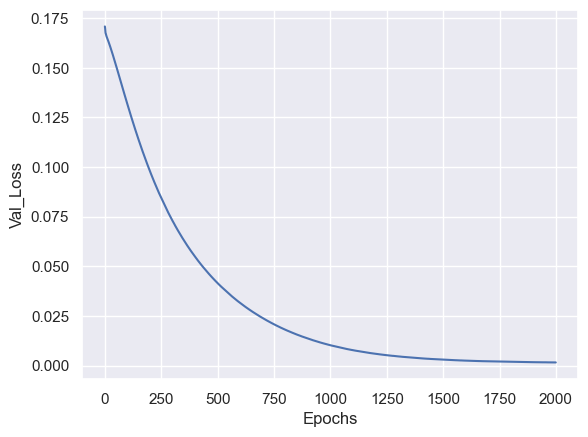

In [220]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [221]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Dwarfs.h5


In [222]:
predNIFE = modelNIFE.predict(X_test)

32/83 [==========>...................] - ETA: 0s

83/83 [==============================] - 0s 2ms/step


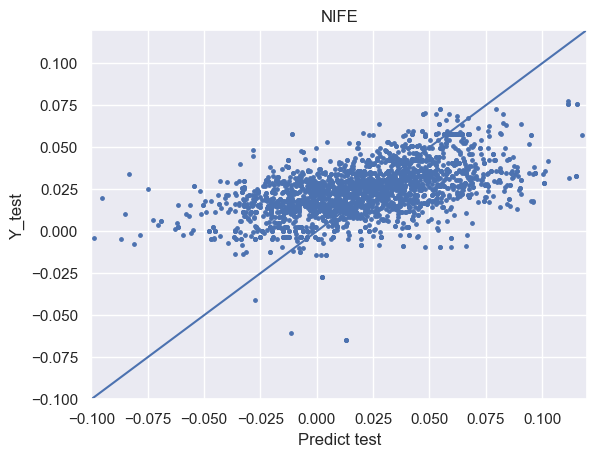

In [223]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [224]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 28.999999999999996%


In [225]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [226]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0053664   5674.15     4.167   -0.389        0.103   
iDR4_3_SPLUS-n06s43_0003986    5068.46     4.559    0.129       -0.043   
iDR4_3_STRIPE82-0163_0043210   5718.82     4.259    0.174       -0.034   
iDR4_3_STRIPE82-0024_0038417   4965.34     4.553   -0.115        0.027   
iDR4_3_STRIPE82-0026_0055783   5540.13     4.362   -0.083        0.009   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0026_0051498   5529.83     4.485   -0.317        0.034   
iDR4_3_SPLUS-n06s42_0038341    5606.14     4.000   -0.286        0.098   
iDR4_3_SPLUS-n07s42_0020791    5950.93     4.321   -0.287        0.031   
iDR4_3_STRIPE82-0026_0047510   5509.40     4.467   -0.202        0.008   
iDR4_3_STRIPE82-0026_0046410   5737.88     4.371   -0.049       -0.007   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0053664  0.16403  0.12644  0.04299  0.15436  0.07335   
iDR4_3_SPLUS-n06s43_0003986  -0.01564  0.00485  0.00349 -0.05594 -0.05776   
iDR4_3_STRIPE82-0163_0043210  0.02105 -0.03282  0.33197 -0.03430  0.04986   
iDR4_3_STRIPE82-0024_0038417 -0.02885  0.02210 -0.08927  0.03986 -0.05223   
iDR4_3_STRIPE82-0026_0055783 -0.05102  0.01213 -0.04668  0.01434 -0.00776   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0026_0051498 -0.00291  0.01073  0.03185  0.07855  0.02345   
iDR4_3_SPLUS-n06s42_0038341   0.02866  0.05948 -0.03184  0.14617  0.07888   
iDR4_3_SPLUS-n07s42_0020791   0.03334  0.00594  0.19262  0.07063  0.02642   
iDR4_3_STRIPE82-0026_0047510  0.02887  0.06905  0.03820  0.02389 -0.02438   
iDR4_3_STRIPE82-0026_0046410 -0.00698 -0.00807 -0.00588 -0.00992 -0.01687   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0053664  0.07251       0.126060     0.153220   
iDR4_3_SPLUS-n06s43_0003986   0.01084      -0.038974     0.006316   
iDR4_3_STRIPE82-0163_0043210  0.08364      -0.015649     0.007217   
iDR4_3_STRIPE82-0024_0038417 -0.01998       0.014388    -0.036438   
iDR4_3_STRIPE82-0026_0055783  0.01749      -0.017635    -0.045317   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0026_0051498 -0.02066       0.056005     0.054792   
iDR4_3_SPLUS-n06s42_0038341   0.01261       0.056604     0.075396   
iDR4_3_SPLUS-n07s42_0020791   0.03008       0.067089     0.094104   
iDR4_3_STRIPE82-0026_0047510 -0.01645      -0.001598     0.025565   
iDR4_3_STRIPE82-0026_0046410 -0.01052      -0.003601    -0.017576   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0053664      0.132131    -0.015247      0.194843   
iDR4_3_SPLUS-n06s43_0003986      -0.002348     0.044618     -0.018361   
iDR4_3_STRIPE82-0163_0043210     -0.019196     0.161867     -0.019039   
iDR4_3_STRIPE82-0024_0038417      0.016748    -0.050503      0.002072   
iDR4_3_STRIPE82-0026_0055783      0.021921    -0.039240     -0.019286   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0026_0051498      0.063414     0.000273      0.124055   
iDR4_3_SPLUS-n06s42_0038341       0.087263     0.034667      0.112901   
iDR4_3_SPLUS-n07s42_0020791       0.057837     0.021273      0.102415   
iDR4_3_STRIPE82-0026_0047510      0.040375     0.010617      0.007971   
iDR4_3_STRIPE82-0026_0046410      0.007714     0.010567      0.015385   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0026_0053664      0.127683      0.049375  
iDR4_3_SPLUS-n06s43_0003986      -0.0220

In [227]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [6]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [7]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157     0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197     0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s26_0045087      0.13231     0.03145     0.24134     0.13181   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.19329    -0.16436     0.27598     0.13263   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [8]:
xtrain = GigCores.iloc[:, :66]

In [9]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [10]:
ytrain = GigCores[columnYtrain]

In [11]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [15]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n06s44_0036362    5192.51     3.734   -0.439        0.067   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_STRIPE82-0024_0036201   5004.99     3.746   -0.008        0.057   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s42_0045596    4997.88     3.757    0.027        0.062   
iDR4_3_STRIPE82-0028_0025061   5025.45     3.227   -0.337    -9999.000   
iDR4_3_SPLUS-n07s43_0047313    5178.59     3.469   -0.333        0.027   
iDR4_3_STRIPE82-0101_0091026   4864.97     2.427   -0.409    -9999.000   
iDR4_3_STRIPE82-0109_0066939   4840.77     2.571   -0.008    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n06s44_0036362      0.08010     0.10334    -0.17856     0.11915   
iDR4_3_STRIPE82-0024_0036201     0.10002     0.06828     0.00861     0.11226   
iDR4_3_STRIPE82-0024_0036201     0.12900     0.04661    -0.01019     0.11996   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n06s42_0045596      0.12224     0.05240     0.03504     0.12735   
iDR4_3_STRIPE82-0028_0025061 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n07s43_0047313      0.02903     0.07342     0.00969     0.07872   
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0109_0066939 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301  
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643  
iDR4_3_SPLUS-n06s44_0036362      0.02420     0.04788     0.008120  
iDR4_3_STRIPE82-0024_0036201     0.03774     0.03733    -0.093786  
iDR4_3_STRIPE82-0024_0036201     0.06104     0.05978    -0.160781  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n06s42_0045596      0.04429     0.05725    -0.167185  
iDR4_3_STRIPE82-0028_0025061 -9999.00000 -9999.00000    -0.142353  
iDR4_3_SPLUS-n07s43_0047313     -0.01739     0.01715    -0.004418  
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000    -0.286899  
iDR4_3_STRIPE82-0109_0066939 -9999.00000 -9999.00000    -0.308696  

[1264 rows x 11 columns]

### Teff

In [46]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [47]:
modelTEFF = baseline_model_teste()

In [48]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.1391 - val_loss: 0.1257 - 616ms/epoch - 308ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.1381 - val_loss: 0.1249 - 253ms/epoch - 126ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.1372 - val_loss: 0.1240 - 44ms/epoch - 22ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.1364 - val_loss: 0.1232 - 43ms/epoch - 22ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1355 - val_loss: 0.1223 - 42ms/epoch - 21ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1346 - val_loss: 0.1214 - 47ms/epoch - 24ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1336 - val_loss: 0.1203 - 42ms/epoch - 21ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1325 - val_loss: 0.1192 - 43ms/epoch - 22ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1313 - val_loss: 0.1179 - 48ms/epoch - 24ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1300 - val_loss: 0.1164 - 42ms/epoch - 21ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1285 - val_loss: 0.1148 - 41ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1268 - val_loss: 0.1130 - 44ms/epoch - 22ms/step
Epoch 13/3000
2/2 - 0

Epoch 101/3000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0416 - 55ms/epoch - 27ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0415 - 58ms/epoch - 29ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0415 - 47ms/epoch - 24ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0412 - 45ms/epoch - 23ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0412 - 51ms/epoch - 25ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0411 - 47ms/epoch - 24ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0409 - 46ms/epoch - 23ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0407 - 45ms/epoch - 22ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0407 - 50ms/epoch - 25ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0406 - val_loss: 0.0405 - 48ms/epoch - 24ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0405 - val_loss: 0.0404 - 50ms/epoch - 25ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0405 - 50ms/epoch - 25ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0318 - 53ms/epoch - 27ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0317 - 54ms/epoch - 27ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0316 - 53ms/epoch - 26ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0317 - 51ms/epoch - 25ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0315 - 56ms/epoch - 28ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0315 - 50ms/epoch - 25ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0314 - 53ms/epoch - 26ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0312 - 47ms/epoch - 24ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0312 - 52ms/epoch - 26ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0313 - 56ms/epoch - 28ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0310 - 55ms/epoch - 28ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0309 - 46ms/epoch - 23ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0253 - 50ms/epoch - 25ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0252 - 43ms/epoch - 22ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0255 - 53ms/epoch - 26ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0250 - 52ms/epoch - 26ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0250 - 51ms/epoch - 26ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0253 - 49ms/epoch - 25ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0249 - 55ms/epoch - 28ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0250 - 45ms/epoch - 23ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0250 - 51ms/epoch - 26ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0248 - 70ms/epoch - 35ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0249 - 53ms/epoch - 27ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0248 - 49ms/epoch - 25ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0209 - 53ms/epoch - 27ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 47ms/epoch - 24ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0211 - 61ms/epoch - 31ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0208 - 50ms/epoch - 25ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 50ms/epoch - 25ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0209 - 58ms/epoch - 29ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0206 - 50ms/epoch - 25ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0210 - 52ms/epoch - 26ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0206 - 49ms/epoch - 25ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0206 - 46ms/epoch - 23ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0211 - 50ms/epoch - 25ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0205 - 52ms/epoch - 26ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0178 - val_loss: 0.0182 - 69ms/epoch - 34ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0179 - 45ms/epoch - 23ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0179 - 69ms/epoch - 35ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0181 - 49ms/epoch - 24ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0179 - 69ms/epoch - 35ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0181 - 57ms/epoch - 28ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0180 - 50ms/epoch - 25ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0177 - 50ms/epoch - 25ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0176 - 51ms/epoch - 26ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0177 - 50ms/epoch - 25ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0180 - 54ms/epoch - 27ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0158 - 47ms/epoch - 24ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 56ms/epoch - 28ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 48ms/epoch - 24ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 47ms/epoch - 23ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 55ms/epoch - 28ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 47ms/epoch - 24ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 46ms/epoch - 23ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 47ms/epoch - 24ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 56ms/epoch - 28ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0156 - 56ms/epoch - 28ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0156 - 53ms/epoch - 27ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0143 - 57ms/epoch - 29ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 50ms/epoch - 25ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 50ms/epoch - 25ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 51ms/epoch - 26ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0142 - 51ms/epoch - 26ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0144 - 51ms/epoch - 25ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0142 - 55ms/epoch - 28ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0143 - 49ms/epoch - 25ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0144 - 51ms/epoch - 25ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0142 - 49ms/epoch - 25ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0145 - 53ms/epoch - 27ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0141 - 57ms/epoch - 28ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0133 - 55ms/epoch - 27ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0131 - 61ms/epoch - 31ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 55ms/epoch - 28ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 47ms/epoch - 24ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0131 - 48ms/epoch - 24ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0132 - 50ms/epoch - 25ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 48ms/epoch - 24ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 51ms/epoch - 26ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 46ms/epoch - 23ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 52ms/epoch - 26ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 55ms/epoch - 28ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0132 - 54ms/epoch - 27ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0123 - 52ms/epoch - 26ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 49ms/epoch - 25ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0124 - 55ms/epoch - 28ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 57ms/epoch - 28ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0124 - 50ms/epoch - 25ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0123 - 49ms/epoch - 25ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 52ms/epoch - 26ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0124 - 56ms/epoch - 28ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 44ms/epoch - 22ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0125 - 58ms/epoch - 29ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0121 - 57ms/epoch - 28ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 47ms/epoch - 24ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 52ms/epoch - 26ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 51ms/epoch - 26ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 48ms/epoch - 24ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 55ms/epoch - 27ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 49ms/epoch - 24ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 54ms/epoch - 27ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0115 - 51ms/epoch - 26ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 52ms/epoch - 26ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0116 - 55ms/epoch - 28ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 53ms/epoch - 27ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0116 - 49ms/epoch - 25ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0111 - 47ms/epoch - 24ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0110 - 49ms/epoch - 25ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0112 - 50ms/epoch - 25ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0110 - 46ms/epoch - 23ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0111 - 49ms/epoch - 25ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0109 - 47ms/epoch - 24ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0109 - 54ms/epoch - 27ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0115 - 46ms/epoch - 23ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0109 - 47ms/epoch - 24ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0114 - 50ms/epoch - 25ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0109 - 55ms/epoch - 28ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0111 - 57ms/epoch - 28

Epoch 1188/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0107 - 51ms/epoch - 25ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0105 - 52ms/epoch - 26ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0107 - 50ms/epoch - 25ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 56ms/epoch - 28ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0106 - 48ms/epoch - 24ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 50ms/epoch - 25ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0105 - 49ms/epoch - 25ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 47ms/epoch - 24ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 51ms/epoch - 26ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0106 - 51ms/epoch - 25ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 53ms/epoch - 27ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0108 - 47ms/epoch - 23

Epoch 1286/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 56ms/epoch - 28ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 55ms/epoch - 28ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 48ms/epoch - 24ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 52ms/epoch - 26ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 56ms/epoch - 28ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0102 - 53ms/epoch - 27ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 57ms/epoch - 29ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0101 - 60ms/epoch - 30ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0101 - 55ms/epoch - 28ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 56ms/epoch - 28

Epoch 1384/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 51ms/epoch - 26ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 55ms/epoch - 28ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 55ms/epoch - 27ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 51ms/epoch - 26ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0100 - 50ms/epoch - 25ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 62ms/epoch - 31ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 53ms/epoch - 27

Epoch 1482/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 39ms/epoch - 20ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0095 - 39ms/epoch - 20ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0099 - 43ms/epoch - 22ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0095 - 40ms/epoch - 20ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0098 - 43ms/epoch - 22ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0094 - 41ms/epoch - 21ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0097 - 58ms/epoch - 29

Epoch 1580/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 46ms/epoch - 23ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 50ms/epoch - 25ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 55ms/epoch - 28ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 50ms/epoch - 25ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 53ms/epoch - 27ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 61ms/epoch - 31ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0098 - 51ms/epoch - 25ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0092 - 51ms/epoch - 26ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0097 - 53ms/epoch - 27ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0093 - 53ms/epoch - 27ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0094 - 54ms/epoch - 27

Epoch 1678/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0089 - 39ms/epoch - 20ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0093 - 42ms/epoch - 21ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0090 - 41ms/epoch - 20ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0091 - 41ms/epoch - 21ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0090 - 43ms/epoch - 21ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 43ms/epoch - 22ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0091 - 39ms/epoch - 20ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 41ms/epoch - 21

Epoch 1776/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 68ms/epoch - 34ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0089 - 57ms/epoch - 29ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 62ms/epoch - 31ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 49ms/epoch - 24ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 69ms/epoch - 35ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 51ms/epoch - 26ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 71ms/epoch - 36ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 62ms/epoch - 31ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 67ms/epoch - 34ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0089 - 57ms/epoch - 29ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 69ms/epoch - 35ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 101ms/epoch - 5

Epoch 1874/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 62ms/epoch - 31ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 42ms/epoch - 21ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0090 - 43ms/epoch - 22ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0085 - 41ms/epoch - 21ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0086 - 44ms/epoch - 22ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 41ms/epoch - 21ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0087 - 47ms/epoch - 24ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 62ms/epoch - 31ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 62ms/epoch - 31ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 64ms/epoch - 32ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 63ms/epoch - 32ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 71ms/epoch - 36

Epoch 1972/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 42ms/epoch - 21ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0084 - 43ms/epoch - 22ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 42ms/epoch - 21ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0084 - 55ms/epoch - 28ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0086 - 43ms/epoch - 22ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0084 - 93ms/epoch - 47ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0084 - 41ms/epoch - 21ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0087 - 77ms/epoch - 39ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0084 - 44ms/epoch - 22ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0085 - 69ms/epoch - 35ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0084 - 41ms/epoch - 21ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0086 - 68ms/epoch - 34

Epoch 2070/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 49ms/epoch - 24ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0084 - 50ms/epoch - 25ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 50ms/epoch - 25ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 63ms/epoch - 32ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 52ms/epoch - 26ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 51ms/epoch - 26ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 55ms/epoch - 28ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0084 - 50ms/epoch - 25ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 51ms/epoch - 26ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 48ms/epoch - 24

Epoch 2168/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 49ms/epoch - 24ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 55ms/epoch - 28ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 44ms/epoch - 22ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0081 - 56ms/epoch - 28ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0085 - 61ms/epoch - 30ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0080 - 50ms/epoch - 25ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0082 - 53ms/epoch - 26ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 58ms/epoch - 29ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 53ms/epoch - 27ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 59ms/epoch - 30ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 51ms/epoch - 26

Epoch 2266/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 47ms/epoch - 23ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 50ms/epoch - 25ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0081 - 53ms/epoch - 27ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 52ms/epoch - 26ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0081 - 47ms/epoch - 24ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 53ms/epoch - 27ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0080 - 53ms/epoch - 27ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 61ms/epoch - 30ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0079 - 59ms/epoch - 30

Epoch 2364/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 22ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 41ms/epoch - 21ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 45ms/epoch - 23ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0080 - 42ms/epoch - 21ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 44ms/epoch - 22ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0083 - 40ms/epoch - 20ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0078 - 47ms/epoch - 24

Epoch 2462/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0077 - 48ms/epoch - 24ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 49ms/epoch - 25ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 53ms/epoch - 27ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 47ms/epoch - 24ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 50ms/epoch - 25ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 49ms/epoch - 24ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 47ms/epoch - 24ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 49ms/epoch - 24ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 55ms/epoch - 28ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0079 - 56ms/epoch - 28ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 55ms/epoch - 28

Epoch 2560/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 43ms/epoch - 22ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 41ms/epoch - 21ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0080 - 42ms/epoch - 21ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0076 - 44ms/epoch - 22ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0082 - 44ms/epoch - 22

Epoch 2658/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0075 - 53ms/epoch - 27ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0074 - 49ms/epoch - 25ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0078 - 54ms/epoch - 27ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0075 - 45ms/epoch - 23ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0079 - 55ms/epoch - 27ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0075 - 52ms/epoch - 26ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 51ms/epoch - 25ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 52ms/epoch - 26ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 50ms/epoch - 25ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 53ms/epoch - 27ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 62ms/epoch - 31ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 59ms/epoch - 29

Epoch 2756/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0077 - 54ms/epoch - 27ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0074 - 58ms/epoch - 29ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0074 - 55ms/epoch - 27ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 46ms/epoch - 23ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 75ms/epoch - 38ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 52ms/epoch - 26ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 51ms/epoch - 26ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 53ms/epoch - 26ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 54ms/epoch - 27ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 60ms/epoch - 30ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 52ms/epoch - 26ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0075 - 52ms/epoch - 26

Epoch 2854/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 41ms/epoch - 21ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 41ms/epoch - 21ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 41ms/epoch - 21ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 42ms/epoch - 21ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 48ms/epoch - 24ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 48ms/epoch - 24ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 23ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 62ms/epoch - 31ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 62ms/epoch - 31ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 61ms/epoch - 30ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 49ms/epoch - 24ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 23

Epoch 2952/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 50ms/epoch - 25ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0073 - 50ms/epoch - 25ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 51ms/epoch - 26ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0074 - 49ms/epoch - 25ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 50ms/epoch - 25ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0077 - 47ms/epoch - 24ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0072 - 48ms/epoch - 24ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 55ms/epoch - 27ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 48ms/epoch - 24ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0075 - 46ms/epoch - 23ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0073 - 49ms/epoch - 25ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0078 - 49ms/epoch - 25

Text(0, 0.5, 'Loss')

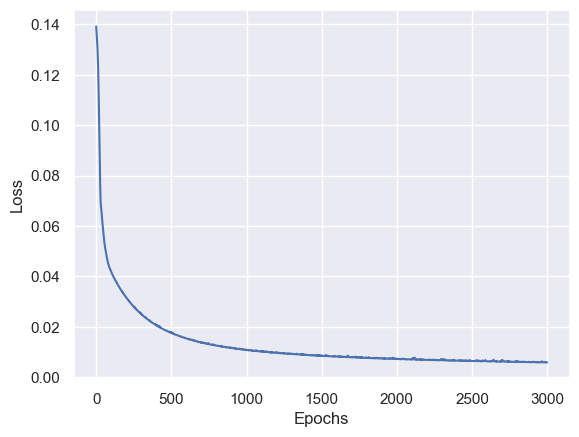

In [49]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

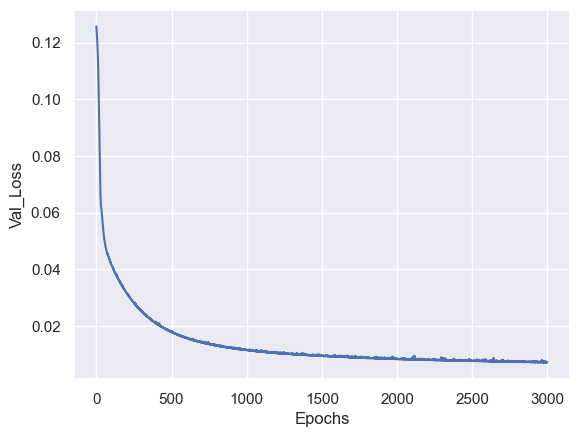

In [50]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [57]:
#modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Giants.h5


In [52]:
predTeff = modelTEFF.predict(X_test)

11/11 [==============================] - 0s 15ms/step


In [53]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_SPLUS-n06s41_0032552           4760.219238  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_STRIPE82-0028_0025061          5050.278320  
...                                           ...  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_SPLUS-n02n28_0022582           4822.096680  
iDR4_3_STRIPE82-0028_0025061          5050.278320  
iDR4_3_STRIPE82-0101_0060114          5186.188965  
iDR4_3_STRIPE82-0003_0028861          5099.375000  

[352 rows x 12 columns]

In [54]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

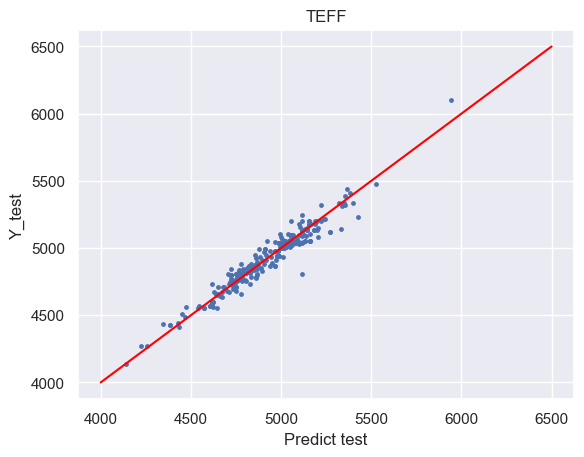

In [55]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [56]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [58]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_SPLUS-n06s41_0032552           4754.007812  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_STRIPE82-0028_0025061          5036.260254  
...                                           ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_SPLUS-n02n28_0022582           4841.565918  
iDR4_3_STRIPE82-0028_0025061          5036.260254  
iDR4_3_STRIPE82-0101_0060114          5203.057129  
iDR4_3_STRIPE82-0003_0028861          5092.685059  

[352 rows x 12 columns]

In [59]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [60]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [61]:
modelLOGG = baseline_model_teste()

In [62]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 10.1205 - val_loss: 10.3684 - 561ms/epoch - 561ms/step
Epoch 2/2000
1/1 - 0s - loss: 10.1138 - val_loss: 10.3613 - 40ms/epoch - 40ms/step
Epoch 3/2000
1/1 - 0s - loss: 10.1067 - val_loss: 10.3538 - 41ms/epoch - 41ms/step
Epoch 4/2000
1/1 - 0s - loss: 10.0993 - val_loss: 10.3456 - 39ms/epoch - 39ms/step
Epoch 5/2000
1/1 - 0s - loss: 10.0911 - val_loss: 10.3367 - 38ms/epoch - 38ms/step
Epoch 6/2000
1/1 - 0s - loss: 10.0824 - val_loss: 10.3276 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 10.0735 - val_loss: 10.3187 - 38ms/epoch - 38ms/step
Epoch 8/2000
1/1 - 0s - loss: 10.0648 - val_loss: 10.3098 - 41ms/epoch - 41ms/step
Epoch 9/2000
1/1 - 0s - loss: 10.0560 - val_loss: 10.3005 - 38ms/epoch - 38ms/step
Epoch 10/2000
1/1 - 0s - loss: 10.0469 - val_loss: 10.2907 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 10.0372 - val_loss: 10.2804 - 40ms/epoch - 40ms/step
Epoch 12/2000
1/1 - 0s - loss: 10.0271 - val_loss: 10.2696 - 42ms/epoch - 42ms/step

Epoch 101/2000
1/1 - 0s - loss: 0.5376 - val_loss: 0.4791 - 42ms/epoch - 42ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.5174 - val_loss: 0.4596 - 41ms/epoch - 41ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.5005 - val_loss: 0.4437 - 35ms/epoch - 35ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.4871 - val_loss: 0.4313 - 38ms/epoch - 38ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.4769 - val_loss: 0.4216 - 41ms/epoch - 41ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.4691 - val_loss: 0.4140 - 40ms/epoch - 40ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.4628 - val_loss: 0.4076 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.4571 - val_loss: 0.4013 - 37ms/epoch - 37ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.4509 - val_loss: 0.3948 - 36ms/epoch - 36ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.4438 - val_loss: 0.3875 - 37ms/epoch - 37ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.4353 - val_loss: 0.3796 - 39ms/epoch - 39ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.4255 - val_loss: 0.3710 - 40ms/epoch - 40ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.1185 - val_loss: 0.1153 - 47ms/epoch - 47ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.1180 - val_loss: 0.1149 - 47ms/epoch - 47ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.1175 - val_loss: 0.1144 - 45ms/epoch - 45ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.1170 - val_loss: 0.1140 - 44ms/epoch - 44ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.1165 - val_loss: 0.1136 - 43ms/epoch - 43ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.1161 - val_loss: 0.1131 - 46ms/epoch - 46ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.1156 - val_loss: 0.1127 - 41ms/epoch - 41ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.1151 - val_loss: 0.1123 - 40ms/epoch - 40ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.1147 - val_loss: 0.1119 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.1142 - val_loss: 0.1115 - 44ms/epoch - 44ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.1138 - val_loss: 0.1111 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.1134 - val_loss: 0.1107 - 42ms/epoch - 42ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0911 - val_loss: 0.0908 - 39ms/epoch - 39ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0910 - val_loss: 0.0907 - 54ms/epoch - 54ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0908 - val_loss: 0.0906 - 38ms/epoch - 38ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0907 - val_loss: 0.0905 - 37ms/epoch - 37ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0906 - val_loss: 0.0904 - 38ms/epoch - 38ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0904 - val_loss: 0.0903 - 35ms/epoch - 35ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0903 - val_loss: 0.0902 - 37ms/epoch - 37ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0902 - val_loss: 0.0901 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0901 - val_loss: 0.0900 - 37ms/epoch - 37ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0900 - val_loss: 0.0899 - 38ms/epoch - 38ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0898 - val_loss: 0.0898 - 41ms/epoch - 41ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0897 - val_loss: 0.0897 - 38ms/epoch - 38ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0822 - val_loss: 0.0838 - 44ms/epoch - 44ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0821 - val_loss: 0.0838 - 44ms/epoch - 44ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0820 - val_loss: 0.0837 - 39ms/epoch - 39ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0820 - val_loss: 0.0837 - 46ms/epoch - 46ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0819 - val_loss: 0.0836 - 40ms/epoch - 40ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0818 - val_loss: 0.0836 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0818 - val_loss: 0.0835 - 44ms/epoch - 44ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0817 - val_loss: 0.0835 - 40ms/epoch - 40ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0834 - 43ms/epoch - 43ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0834 - 42ms/epoch - 42ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0815 - val_loss: 0.0833 - 48ms/epoch - 48ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0814 - val_loss: 0.0833 - 41ms/epoch - 41ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0766 - val_loss: 0.0794 - 45ms/epoch - 45ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0766 - val_loss: 0.0794 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0765 - val_loss: 0.0793 - 42ms/epoch - 42ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0765 - val_loss: 0.0793 - 43ms/epoch - 43ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0793 - 66ms/epoch - 66ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0792 - 43ms/epoch - 43ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0792 - 69ms/epoch - 69ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0791 - 47ms/epoch - 47ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0762 - val_loss: 0.0791 - 69ms/epoch - 69ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0762 - val_loss: 0.0791 - 43ms/epoch - 43ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0790 - 70ms/epoch - 70ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0790 - 43ms/epoch - 43ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0725 - val_loss: 0.0764 - 39ms/epoch - 39ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0764 - 38ms/epoch - 38ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0764 - 42ms/epoch - 42ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0763 - 42ms/epoch - 42ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 38ms/epoch - 38ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 38ms/epoch - 38ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0762 - 37ms/epoch - 37ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0762 - 38ms/epoch - 38ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0721 - val_loss: 0.0762 - 40ms/epoch - 40ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0721 - val_loss: 0.0762 - 38ms/epoch - 38ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0741 - 44ms/epoch - 44ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0740 - 40ms/epoch - 40ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0740 - 48ms/epoch - 48ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 45ms/epoch - 45ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 45ms/epoch - 45ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0739 - 48ms/epoch - 48ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 52ms/epoch - 52ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 51ms/epoch - 51ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 42ms/epoch - 42ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0690 - val_loss: 0.0739 - 45ms/epoch - 45ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0690 - val_loss: 0.0738 - 40ms/epoch - 40ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 49ms/epoch - 49ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 46ms/epoch - 46ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 44ms/epoch - 44ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0720 - 46ms/epoch - 46ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 48ms/epoch - 48ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 41ms/epoch - 41ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 47ms/epoch - 47ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 45ms/epoch - 45ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 52ms/epoch - 52ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 52ms/epoch - 52ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 44ms/epoch - 44ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 48ms/epoch - 48ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 47ms/epoch - 47ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 48ms/epoch - 48ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 51ms/epoch - 51ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 44ms/epoch - 44ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0701 - 42ms/epoch - 42ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 42ms/epoch - 42ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 45ms/epoch - 45ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 41ms/epoch - 41ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 44ms/epoch - 44ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0700 - 49ms/epoch - 49ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0687 - 43ms/epoch - 43ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0687 - 48ms/epoch - 48ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 45ms/epoch - 45ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 50ms/epoch - 50ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 59ms/epoch - 59ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 65ms/epoch - 65ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 51ms/epoch - 51ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0686 - 49ms/epoch - 49ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 46ms/epoch - 46ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 39ms/epoch - 39ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 45ms/epoch - 45ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 45ms/epoch - 45ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 40ms/epoch - 40ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 45ms/epoch - 45ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 42ms/epoch - 42ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 42ms/epoch - 42ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 41ms/epoch - 41ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 43ms/epoch - 43ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 42ms/epoch - 42ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 40ms/epoch - 40ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 38ms/epoch - 38

Epoch 1188/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0662 - 50ms/epoch - 50ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 48ms/epoch - 48ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 47ms/epoch - 47ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 50ms/epoch - 50ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 67ms/epoch - 67ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 47ms/epoch - 47ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 51ms/epoch - 51ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 49ms/epoch - 49ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0660 - 54ms/epoch - 54ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0660 - 44ms/epoch - 44ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0660 - 50ms/epoch - 50ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0660 - 48ms/epoch - 48

Epoch 1286/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0651 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 47ms/epoch - 47ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 40ms/epoch - 40ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 40ms/epoch - 40ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 45ms/epoch - 45ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 48ms/epoch - 48ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 40ms/epoch - 40ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 44ms/epoch - 44ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 47ms/epoch - 47ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 52ms/epoch - 52ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 46ms/epoch - 46ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 44ms/epoch - 44

Epoch 1384/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 43ms/epoch - 43ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 51ms/epoch - 51ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 45ms/epoch - 45ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 43ms/epoch - 43ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 45ms/epoch - 45ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 42ms/epoch - 42ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0642 - 40ms/epoch - 40ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 49ms/epoch - 49ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 53ms/epoch - 53ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 50ms/epoch - 50ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 42ms/epoch - 42ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 58ms/epoch - 58

Epoch 1482/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0633 - 50ms/epoch - 50ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 48ms/epoch - 48ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 56ms/epoch - 56ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 57ms/epoch - 57ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 52ms/epoch - 52ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 60ms/epoch - 60ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 61ms/epoch - 61ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 55ms/epoch - 55ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 47ms/epoch - 47ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 54ms/epoch - 54ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 46ms/epoch - 46ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 45ms/epoch - 45

Epoch 1580/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 40ms/epoch - 40ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 36ms/epoch - 36ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 41ms/epoch - 41ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 42ms/epoch - 42ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 37ms/epoch - 37ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0518 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0518 - val_loss: 0.0626 - 38ms/epoch - 38

Epoch 1678/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 42ms/epoch - 42ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 43ms/epoch - 43ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 40ms/epoch - 40ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0620 - 44ms/epoch - 44ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 50ms/epoch - 50ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0620 - 42ms/epoch - 42ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 45ms/epoch - 45ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 44ms/epoch - 44ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 42ms/epoch - 42ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0621 - 44ms/epoch - 44ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 48ms/epoch - 48ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 46ms/epoch - 46

Epoch 1776/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0616 - 49ms/epoch - 49ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 47ms/epoch - 47ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 45ms/epoch - 45ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 41ms/epoch - 41ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 47ms/epoch - 47ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 48ms/epoch - 48ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 59ms/epoch - 59ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 66ms/epoch - 66ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 46ms/epoch - 46

Epoch 1874/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0611 - 39ms/epoch - 39ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 39ms/epoch - 39ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 42ms/epoch - 42ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 43ms/epoch - 43ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 37ms/epoch - 37ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0610 - 38ms/epoch - 38ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0480 - val_loss: 0.0610 - 38ms/epoch - 38

Epoch 1972/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 71ms/epoch - 71ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 47ms/epoch - 47ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 43ms/epoch - 43ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 44ms/epoch - 44ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 46ms/epoch - 46ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0606 - 55ms/epoch - 55ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 45ms/epoch - 45ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 97ms/epoch - 97ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0607 - 46ms/epoch - 46ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0606 - 75ms/epoch - 75ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0607 - 41ms/epoch - 41ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0606 - 68ms/epoch - 68

Text(0, 0.5, 'Loss')

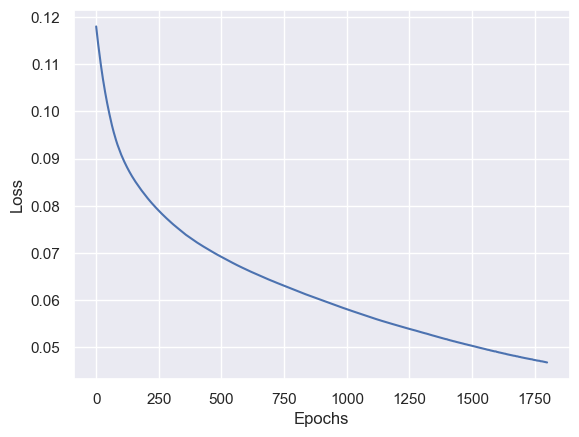

In [68]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

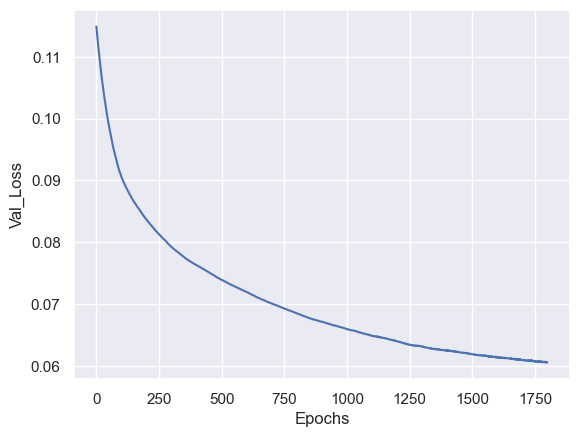

In [67]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [69]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Giants.h5


In [70]:
predlogg = modelLOGG.predict(X_test)

11/11 [==============================] - 0s 2ms/step


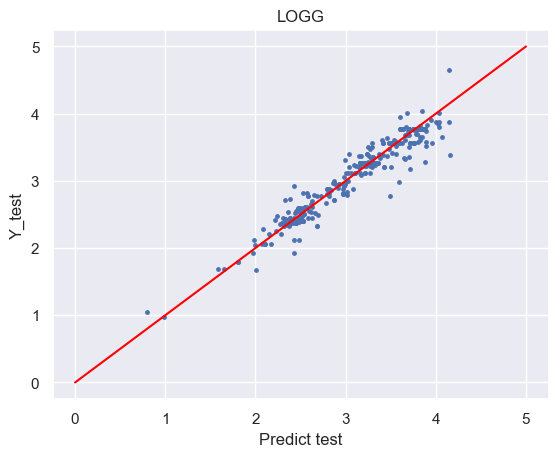

In [71]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [73]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 93.0%


In [74]:
Y_test['LOGG_Predict'] = predlogg

In [75]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_SPLUS-n06s41_0032552           4754.007812      2.362252  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746  
...                                           ...           ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_SPLUS-n02n28_0022582           4841.565918      2.826291  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746  
iDR4_3_STRIPE82-0101_0060114          5203.057129      3.371349  
iDR4_3_STRIPE82-0003_0028861          5092.685059      3.348206  

[352 rows x 13 columns]

In [76]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [77]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [78]:
modelFEH = baseline_model_teste()

In [80]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.2246 - val_loss: 0.2123 - 943ms/epoch - 943ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2234 - val_loss: 0.2113 - 41ms/epoch - 41ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2224 - val_loss: 0.2104 - 46ms/epoch - 46ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2214 - val_loss: 0.2095 - 42ms/epoch - 42ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2206 - val_loss: 0.2088 - 40ms/epoch - 40ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2198 - val_loss: 0.2081 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2191 - val_loss: 0.2074 - 37ms/epoch - 37ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2183 - val_loss: 0.2068 - 36ms/epoch - 36ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2176 - val_loss: 0.2061 - 39ms/epoch - 39ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2169 - val_loss: 0.2054 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2162 - val_loss: 0.2046 - 38ms/epoch - 38ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2154 - val_loss: 0.2038 - 42ms/epoch - 42ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0833 - val_loss: 0.0834 - 42ms/epoch - 42ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0824 - val_loss: 0.0826 - 45ms/epoch - 45ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0814 - val_loss: 0.0817 - 43ms/epoch - 43ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0805 - val_loss: 0.0808 - 42ms/epoch - 42ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0796 - val_loss: 0.0799 - 39ms/epoch - 39ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0786 - val_loss: 0.0790 - 47ms/epoch - 47ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0777 - val_loss: 0.0781 - 43ms/epoch - 43ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0767 - val_loss: 0.0772 - 43ms/epoch - 43ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0758 - val_loss: 0.0763 - 42ms/epoch - 42ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0748 - val_loss: 0.0754 - 44ms/epoch - 44ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0739 - val_loss: 0.0745 - 47ms/epoch - 47ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0730 - val_loss: 0.0736 - 42ms/epoch - 42ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0489 - 53ms/epoch - 53ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0488 - val_loss: 0.0488 - 43ms/epoch - 43ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0486 - 39ms/epoch - 39ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0485 - 54ms/epoch - 54ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0485 - val_loss: 0.0484 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0483 - val_loss: 0.0483 - 40ms/epoch - 40ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0482 - 40ms/epoch - 40ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0480 - 56ms/epoch - 56ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0480 - val_loss: 0.0479 - 47ms/epoch - 47ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0479 - val_loss: 0.0478 - 58ms/epoch - 58ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0478 - val_loss: 0.0477 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0476 - 38ms/epoch - 38ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0391 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0391 - 40ms/epoch - 40ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0389 - 42ms/epoch - 42ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0389 - 43ms/epoch - 43ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0388 - 42ms/epoch - 42ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0387 - 45ms/epoch - 45ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0386 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0387 - val_loss: 0.0386 - 42ms/epoch - 42ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0386 - val_loss: 0.0385 - 44ms/epoch - 44ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0384 - 47ms/epoch - 47ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0383 - 44ms/epoch - 44ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0337 - 56ms/epoch - 56ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0336 - 46ms/epoch - 46ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0336 - 47ms/epoch - 47ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0335 - 48ms/epoch - 48ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0335 - 44ms/epoch - 44ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0334 - 48ms/epoch - 48ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0334 - 48ms/epoch - 48ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0334 - 42ms/epoch - 42ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0333 - 50ms/epoch - 50ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0333 - 44ms/epoch - 44ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0332 - 46ms/epoch - 46ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0332 - 47ms/epoch - 47ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0296 - 36ms/epoch - 36ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0297 - 35ms/epoch - 35ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0296 - 39ms/epoch - 39ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0296 - 43ms/epoch - 43ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0295 - 38ms/epoch - 38ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0295 - 35ms/epoch - 35ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0294 - 107ms/epoch - 107ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0294 - 34ms/epoch - 34ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0294 - 71ms/epoch - 71ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0293 - 37ms/epoch - 37ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0294 - 70ms/epoch - 70ms/step
Ep

Epoch 596/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 43ms/epoch - 43ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0267 - 46ms/epoch - 46ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 48ms/epoch - 48ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 48ms/epoch - 48ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 50ms/epoch - 50ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 45ms/epoch - 45ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 46ms/epoch - 46ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 42ms/epoch - 42ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 47ms/epoch - 47ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0264 - 43ms/epoch - 43ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 47ms/epoch - 47ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0264 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0245 - 55ms/epoch - 55ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 58ms/epoch - 58ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0244 - 46ms/epoch - 46ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 43ms/epoch - 43ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 43ms/epoch - 43ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0242 - 49ms/epoch - 49ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0242 - 51ms/epoch - 51ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0242 - 47ms/epoch - 47ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0242 - 42ms/epoch - 42ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0243 - 44ms/epoch - 44ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0241 - 44ms/epoch - 44ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0243 - 47ms/epoch - 47ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0228 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0225 - 42ms/epoch - 42ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0226 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0225 - 49ms/epoch - 49ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 53ms/epoch - 53ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0226 - 49ms/epoch - 49ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0224 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0226 - 50ms/epoch - 50ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 49ms/epoch - 49ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0223 - 47ms/epoch - 47ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 42ms/epoch - 42ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 44ms/epoch - 44ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 42ms/epoch - 42ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 39ms/epoch - 39ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0212 - 42ms/epoch - 42ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 43ms/epoch - 43ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0212 - 42ms/epoch - 42ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 41ms/epoch - 41ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 47ms/epoch - 47ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 53ms/epoch - 53ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0209 - 44ms/epoch - 44ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0208 - 42ms/epoch - 42ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 39ms/epoch - 39ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 45ms/epoch - 45ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 43ms/epoch - 43ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 45ms/epoch - 45ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 46ms/epoch - 46ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 47ms/epoch - 47ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0196 - 39ms/epoch - 39ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0196 - 47ms/epoch - 47ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0195 - 45ms/epoch - 45ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0186 - 37ms/epoch - 37ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 54ms/epoch - 54ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 60ms/epoch - 60ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0186 - 58ms/epoch - 58ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0186 - 57ms/epoch - 57ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0187 - 56ms/epoch - 56ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 47ms/epoch - 47ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 44ms/epoch - 44ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 42ms/epoch - 42ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 39ms/epoch - 39

Epoch 1188/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0179 - 42ms/epoch - 42ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0178 - 48ms/epoch - 48ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 50ms/epoch - 50ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 42ms/epoch - 42ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 39ms/epoch - 39ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 46ms/epoch - 46ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0176 - 44ms/epoch - 44ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0176 - 44ms/epoch - 44

Epoch 1286/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 52ms/epoch - 52ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 51ms/epoch - 51ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0149 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0149 - val_loss: 0.0171 - 52ms/epoch - 52ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 48ms/epoch - 48ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 45ms/epoch - 45ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 41ms/epoch - 41ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 45ms/epoch - 45ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0172 - 49ms/epoch - 49ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 49ms/epoch - 49

Epoch 1384/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 54ms/epoch - 54ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 44ms/epoch - 44ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 47ms/epoch - 47ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 51ms/epoch - 51ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 50ms/epoch - 50ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 43ms/epoch - 43ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0164 - 47ms/epoch - 47ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0164 - 52ms/epoch - 52ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0165 - 53ms/epoch - 53ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0163 - 44ms/epoch - 44ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 42ms/epoch - 42

Epoch 1482/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 41ms/epoch - 41ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 41ms/epoch - 41ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 49ms/epoch - 49ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 51ms/epoch - 51ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0158 - 40ms/epoch - 40

Epoch 1580/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 69ms/epoch - 69ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 45ms/epoch - 45ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 70ms/epoch - 70ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0156 - 45ms/epoch - 45ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 50ms/epoch - 50ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 48ms/epoch - 48ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 47ms/epoch - 47ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 41ms/epoch - 41ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 53ms/epoch - 53

Epoch 1678/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 44ms/epoch - 44ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0151 - 45ms/epoch - 45ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0151 - 47ms/epoch - 47ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0150 - 41ms/epoch - 41ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0152 - 51ms/epoch - 51ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0153 - 47ms/epoch - 47ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 50ms/epoch - 50ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0153 - 42ms/epoch - 42ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0150 - 48ms/epoch - 48ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0152 - 47ms/epoch - 47ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0150 - 46ms/epoch - 46

Epoch 1776/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 45ms/epoch - 45ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 39ms/epoch - 39ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 50ms/epoch - 50ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 42ms/epoch - 42ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 42ms/epoch - 42ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 46ms/epoch - 46ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 45ms/epoch - 45ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0149 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 48ms/epoch - 48ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 45ms/epoch - 45ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 59ms/epoch - 59ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 50ms/epoch - 50

Epoch 1874/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0150 - 51ms/epoch - 51ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0145 - 44ms/epoch - 44ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0148 - 44ms/epoch - 44ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0144 - 52ms/epoch - 52ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0145 - 50ms/epoch - 50ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 51ms/epoch - 51ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0144 - 45ms/epoch - 45ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0146 - 46ms/epoch - 46ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 46ms/epoch - 46ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0147 - 49ms/epoch - 49ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 41ms/epoch - 41ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0145 - 45ms/epoch - 45

Epoch 1972/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0142 - 39ms/epoch - 39ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0143 - 39ms/epoch - 39ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0141 - 40ms/epoch - 40ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0143 - 38ms/epoch - 38ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0141 - 38ms/epoch - 38ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 38ms/epoch - 38ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 41ms/epoch - 41ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 39ms/epoch - 39ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 38ms/epoch - 38ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0141 - 36ms/epoch - 36ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 36ms/epoch - 36ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0141 - 38ms/epoch - 38

Text(0, 0.5, 'Loss')

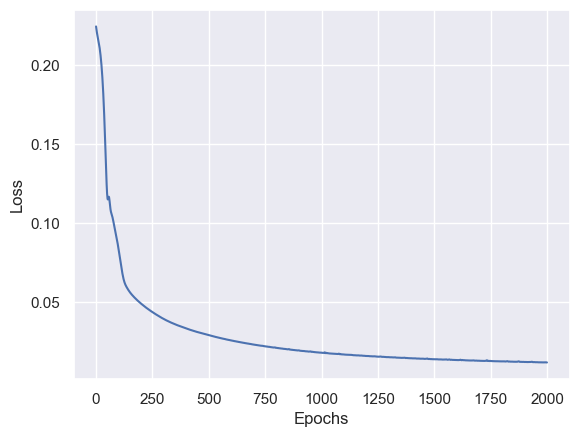

In [81]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

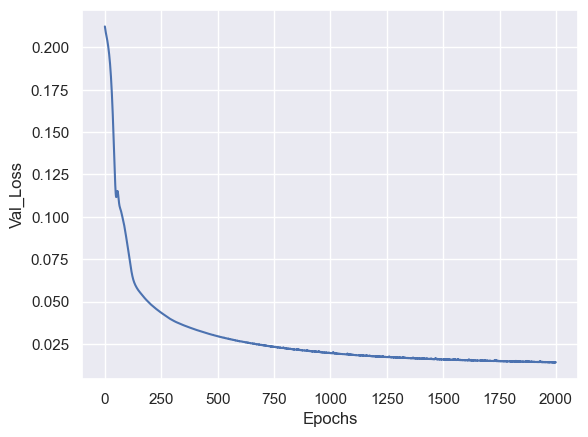

In [82]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [83]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Giants.h5


In [84]:
predfeh = modelFEH.predict(X_test)

11/11 [==============================] - 0s 7ms/step


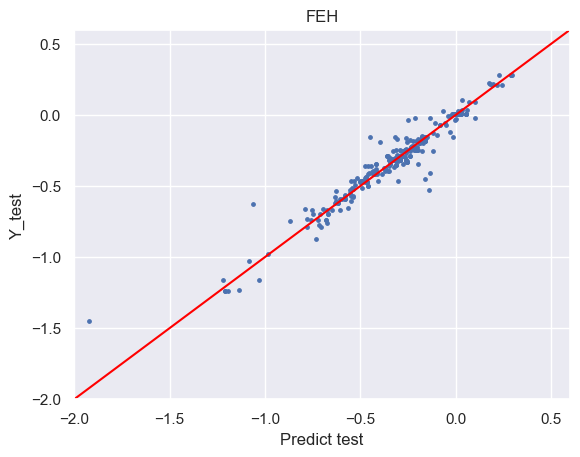

In [85]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [86]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [87]:
Y_test['FEH_Predict'] = predfeh

In [88]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_SPLUS-n06s41_0032552           4754.007812      2.362252    -0.345960  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746    -0.319077  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_SPLUS-n02n28_0022582           4841.565918      2.826291    -0.304204  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746    -0.319077  
iDR4_3_STRIPE82-0101_0060114          5203.057129      3.371349    -0.022805  
iDR4_3_STRIPE82-0003_0028861          5092.685059      3.348206    -0.348073  

[352 rows x 14 columns]

In [89]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [5]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [7]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157     0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197     0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s26_0045087      0.13231     0.03145     0.24134     0.13181   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.19329    -0.16436     0.27598     0.13263   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [8]:
GigCoresParams = GigCores.loc[GigCores['alpha_m_cnn'] != -9999]

In [9]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0011946  0.3329  0.5624  1.1757  1.3186  1.8714  2.0605   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0011946  2.5632  2.6539  2.7989  2.8394  ...   4987.04   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201  0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157  0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0168_0011946     3.309   -0.313        0.163  0.11010   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026   0.20527 -0.05186  0.28106  0.16079  0.06973  
iDR4_3_SPLUS-n01s26_0045087   0.13231  0.03145  0.24134  0.13181  0.08347  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0168_0011946  0.15580  0.01234  0.25676  0.12517  0.05413  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  

[1494 rows x 76 column

In [10]:
print('cfe =', GigCoresParams['c_fe'].min())
print('cafe = ', GigCoresParams['ca_fe'].min())
print('nfe = ', GigCoresParams['n_fe'].min())
print('mgfe = ', GigCoresParams['mg_fe'].min())
print('sife = ', GigCoresParams['si_fe'].min())
print('nife = ', GigCoresParams['ni_fe'].min())

cfe = -0.8645
cafe =  -0.08675
nfe =  -0.22213
mgfe =  -0.09373
sife =  -0.0602
nife =  -0.13236


In [11]:
xtrain = GigCoresParams.iloc[:, :66]

In [12]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [14]:
ytrain = GigCoresParams[columnYtrain]

In [15]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [16]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [17]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [18]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

### Alpha

In [19]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [20]:
modelAlpha = baseline_model_teste()

In [21]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 4s - loss: 0.0676 - val_loss: 0.0698 - 4s/epoch - 4s/step
Epoch 2/1500
1/1 - 0s - loss: 0.0673 - val_loss: 0.0695 - 39ms/epoch - 39ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0670 - val_loss: 0.0691 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0666 - val_loss: 0.0688 - 37ms/epoch - 37ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0663 - val_loss: 0.0684 - 36ms/epoch - 36ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0660 - val_loss: 0.0680 - 37ms/epoch - 37ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0656 - val_loss: 0.0676 - 35ms/epoch - 35ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0652 - val_loss: 0.0672 - 37ms/epoch - 37ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0649 - val_loss: 0.0668 - 38ms/epoch - 38ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0645 - val_loss: 0.0664 - 37ms/epoch - 37ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0641 - val_loss: 0.0660 - 37ms/epoch - 37ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0637 - val_loss: 0.0655 - 36ms/epoch - 36ms/step
Epoch 13/1500
1/1 - 0s - loss

1/1 - 0s - loss: 0.0447 - val_loss: 0.0450 - 40ms/epoch - 40ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0445 - val_loss: 0.0448 - 39ms/epoch - 39ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0444 - val_loss: 0.0447 - 42ms/epoch - 42ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0442 - val_loss: 0.0445 - 43ms/epoch - 43ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0441 - val_loss: 0.0443 - 43ms/epoch - 43ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0439 - val_loss: 0.0442 - 39ms/epoch - 39ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0438 - val_loss: 0.0440 - 47ms/epoch - 47ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0436 - val_loss: 0.0439 - 42ms/epoch - 42ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0435 - val_loss: 0.0437 - 44ms/epoch - 44ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0433 - val_loss: 0.0435 - 45ms/epoch - 45ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0432 - val_loss: 0.0434 - 46ms/epoch - 46ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0430 - val_loss: 0.0432 - 43ms/epoch - 43ms/step
Epoch 113/1500
1/1 

Epoch 200/1500
1/1 - 0s - loss: 0.0336 - val_loss: 0.0335 - 44ms/epoch - 44ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0335 - val_loss: 0.0334 - 51ms/epoch - 51ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0333 - 49ms/epoch - 49ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0332 - 50ms/epoch - 50ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0333 - val_loss: 0.0331 - 61ms/epoch - 61ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0332 - val_loss: 0.0330 - 53ms/epoch - 53ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0329 - 45ms/epoch - 45ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0330 - val_loss: 0.0329 - 41ms/epoch - 41ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0329 - val_loss: 0.0328 - 44ms/epoch - 44ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0327 - 49ms/epoch - 49ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0326 - 56ms/epoch - 56ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0327 - val_loss: 0.0325 - 84ms/epoch - 84ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0261 - val_loss: 0.0261 - 39ms/epoch - 39ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0261 - val_loss: 0.0260 - 35ms/epoch - 35ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0260 - val_loss: 0.0260 - 36ms/epoch - 36ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0259 - val_loss: 0.0259 - 37ms/epoch - 37ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0259 - val_loss: 0.0258 - 44ms/epoch - 44ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0258 - val_loss: 0.0258 - 41ms/epoch - 41ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0257 - 52ms/epoch - 52ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0256 - 37ms/epoch - 37ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0256 - 40ms/epoch - 40ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 39ms/epoch - 39ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 37ms/epoch - 37ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0254 - 37ms/epoch - 37ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0204 - val_loss: 0.0205 - 35ms/epoch - 35ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0204 - 36ms/epoch - 36ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0204 - 37ms/epoch - 37ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0202 - val_loss: 0.0203 - 36ms/epoch - 36ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0202 - val_loss: 0.0203 - 36ms/epoch - 36ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0201 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0201 - val_loss: 0.0202 - 38ms/epoch - 38ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0201 - 39ms/epoch - 39ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0201 - 39ms/epoch - 39ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0200 - 34ms/epoch - 34ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0200 - 34ms/epoch - 34ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0199 - 36ms/epoch - 36ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0162 - 39ms/epoch - 39ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0161 - 39ms/epoch - 39ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0160 - 39ms/epoch - 39ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0160 - 38ms/epoch - 38ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0160 - 39ms/epoch - 39ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 40ms/epoch - 40ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 44ms/epoch - 44ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 51ms/epoch - 51ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 70ms/epoch - 70ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0126 - val_loss: 0.0129 - 36ms/epoch - 36ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0126 - val_loss: 0.0128 - 39ms/epoch - 39ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 38ms/epoch - 38ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0127 - 39ms/epoch - 39ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0127 - 41ms/epoch - 41ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 40ms/epoch - 40ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 38ms/epoch - 38ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 36ms/epoch - 36ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 37ms/epoch - 37ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 49ms/epoch - 49ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 42ms/epoch - 42ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 45ms/epoch - 45ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 45ms/epoch - 45ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 44ms/epoch - 44ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 42ms/epoch - 42ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 37ms/epoch - 37ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 40ms/epoch - 40ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 39ms/epoch - 39ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 39ms/epoch - 39ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0081 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0081 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 37ms/epoch - 37ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 37ms/epoch - 37ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 37ms/epoch - 37ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 36ms/epoch - 36ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 37ms/epoch - 37ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0070 - 45ms/epoch - 45ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0069 - 43ms/epoch - 43ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 46ms/epoch - 46ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 58ms/epoch - 58ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 54ms/epoch - 54ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 60ms/epoch - 60ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 52ms/epoch - 52ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 50ms/epoch - 50ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 52ms/epoch - 52ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0068 - 60ms/epoch - 60ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0064 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0064 - val_loss: 0.0068 - 50ms/epoch - 50ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0059 - 88ms/epoch - 88ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 38ms/epoch - 38ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 76ms/epoch - 76ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 38ms/epoch - 38ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 71ms/epoch - 71ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 37ms/epoch - 37ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 63ms/epoch - 63ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 39ms/epoch - 39ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0058 - 69ms/epoch - 69ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0058 - 43ms/epoch - 43ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0057 - 46ms/epoch - 46ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 54ms/epoch - 54ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 51ms/epoch - 51ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 49ms/epoch - 49ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 49ms/epoch - 49ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 43ms/epoch - 43ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 44ms/epoch - 44ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 55ms/epoch - 55ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 51ms/epoch - 51ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 44ms/epoch - 44

Epoch 1188/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 44ms/epoch - 44ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0044 - 44ms/epoch - 44ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 56ms/epoch - 56ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 57ms/epoch - 57ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 45ms/epoch - 45ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 44ms/epoch - 44ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 49ms/epoch - 49ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 47ms/epoch - 47ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 60ms/epoch - 60ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55

Epoch 1286/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 57ms/epoch - 57ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 49ms/epoch - 49ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 53ms/epoch - 53ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 56ms/epoch - 56ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 58ms/epoch - 58ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 49ms/epoch - 49ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 47ms/epoch - 47ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 46ms/epoch - 46ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 53ms/epoch - 53ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 59ms/epoch - 59ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 55ms/epoch - 55ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 53ms/epoch - 53

Epoch 1384/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 42ms/epoch - 42ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 37ms/epoch - 37ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 39ms/epoch - 39ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 37ms/epoch - 37ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 40ms/epoch - 40ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 42ms/epoch - 42ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 40ms/epoch - 40ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 40ms/epoch - 40

Epoch 1482/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 49ms/epoch - 49ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 44ms/epoch - 44ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 48ms/epoch - 48ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 44ms/epoch - 44ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 46ms/epoch - 46ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 58ms/epoch - 58ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 50ms/epoch - 50ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 48ms/epoch - 48ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 46ms/epoch - 46ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 51ms/epoch - 51

Text(0, 0.5, 'Loss')

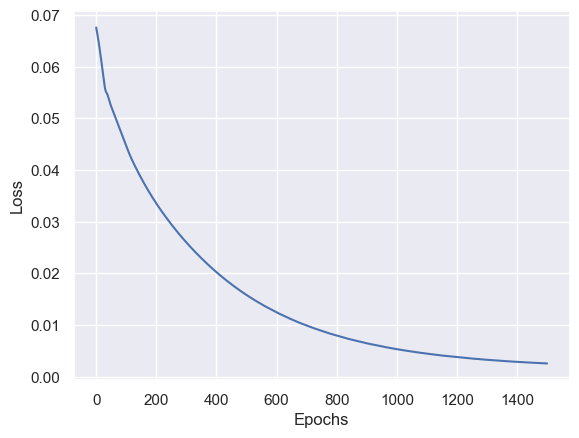

In [22]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

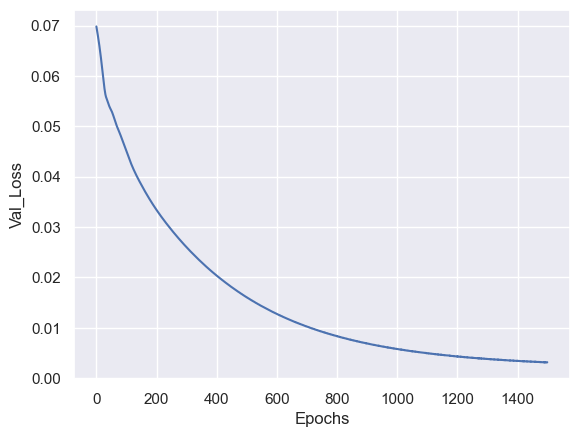

In [23]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [25]:
#modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Giants.h5


In [26]:
predalpha = modelAlpha.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [27]:
predalpha

array([[ 0.17792046],
       [ 0.04623515],
       [ 0.11350925],
       [ 0.04623515],
       [ 0.00855672],
       [ 0.13597155],
       [ 0.0930157 ],
       [ 0.14201203],
       [ 0.1800431 ],
       [ 0.14342141],
       [ 0.31133866],
       [ 0.21638332],
       [ 0.01854065],
       [ 0.0164429 ],
       [ 0.04646809],
       [ 0.02550518],
       [ 0.0479861 ],
       [ 0.10068764],
       [ 0.04755516],
       [ 0.00238003],
       [ 0.0479861 ],
       [ 0.21638332],
       [ 0.22122076],
       [ 0.14201203],
       [ 0.16524032],
       [ 0.22122076],
       [ 0.04623515],
       [ 0.14901026],
       [-0.00902412],
       [ 0.21484724],
       [ 0.04623515],
       [ 0.07492402],
       [-0.01927429],
       [ 0.20780678],
       [ 0.05929711],
       [ 0.0479861 ],
       [ 0.02550518],
       [ 0.20780678],
       [ 0.19945699],
       [ 0.14165708],
       [ 0.04623515],
       [-0.00902412],
       [-0.01798274],
       [ 0.12357461],
       [ 0.24685314],
       [ 0

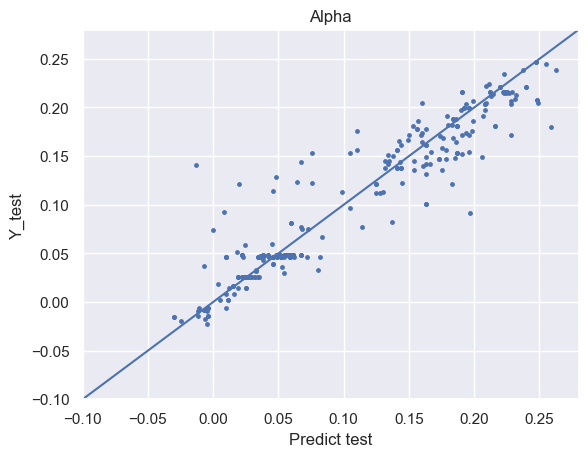

In [28]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [29]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [30]:
Y_test['alpha_predict'] = predalpha

In [31]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920  
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235  
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509  
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235  
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557  
...                               ...            ...  
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954  
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929  
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680  
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554  
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392  

[299 rows x 11 columns]

In [32]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [46]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [47]:
modelCFE = baseline_model_teste()

In [48]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0638 - val_loss: 0.0639 - 607ms/epoch - 607ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0635 - val_loss: 0.0635 - 180ms/epoch - 180ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0632 - val_loss: 0.0632 - 38ms/epoch - 38ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0630 - 39ms/epoch - 39ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0627 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0624 - val_loss: 0.0624 - 40ms/epoch - 40ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0621 - 35ms/epoch - 35ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0619 - val_loss: 0.0618 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0616 - val_loss: 0.0615 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0613 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0610 - val_loss: 0.0608 - 36ms/epoch - 36ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0604 - 38ms/epoch - 38ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0451 - val_loss: 0.0439 - 43ms/epoch - 43ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0450 - val_loss: 0.0438 - 40ms/epoch - 40ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0449 - val_loss: 0.0437 - 41ms/epoch - 41ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0436 - 42ms/epoch - 42ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0435 - 39ms/epoch - 39ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0433 - 51ms/epoch - 51ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0432 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0431 - 90ms/epoch - 90ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0441 - val_loss: 0.0430 - 38ms/epoch - 38ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0440 - val_loss: 0.0429 - 77ms/epoch - 77ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0428 - 37ms/epoch - 37ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0438 - val_loss: 0.0426 - 68ms/epoch - 68ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0335 - 47ms/epoch - 47ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0333 - val_loss: 0.0334 - 42ms/epoch - 42ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0334 - 39ms/epoch - 39ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0333 - 40ms/epoch - 40ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0332 - 42ms/epoch - 42ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0331 - 40ms/epoch - 40ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0330 - 45ms/epoch - 45ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0330 - 43ms/epoch - 43ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0326 - val_loss: 0.0329 - 48ms/epoch - 48ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0328 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0327 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0327 - 43ms/epoch - 43ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0268 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0267 - 43ms/epoch - 43ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0267 - 45ms/epoch - 45ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 38ms/epoch - 38ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 43ms/epoch - 43ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0264 - 49ms/epoch - 49ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 49ms/epoch - 49ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0263 - 42ms/epoch - 42ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0263 - 54ms/epoch - 54ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0263 - 52ms/epoch - 52ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0262 - 48ms/epoch - 48ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0262 - 46ms/epoch - 46ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0218 - 50ms/epoch - 50ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0217 - 43ms/epoch - 43ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0218 - 41ms/epoch - 41ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0216 - 45ms/epoch - 45ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0217 - 46ms/epoch - 46ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0215 - 42ms/epoch - 42ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0216 - 42ms/epoch - 42ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0215 - 41ms/epoch - 41ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0203 - val_loss: 0.0215 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0203 - val_loss: 0.0214 - 48ms/epoch - 48ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0202 - val_loss: 0.0213 - 40ms/epoch - 40ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0202 - val_loss: 0.0214 - 44ms/epoch - 44ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0181 - 41ms/epoch - 41ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0181 - 57ms/epoch - 57ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0181 - 51ms/epoch - 51ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0180 - 44ms/epoch - 44ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0180 - 40ms/epoch - 40ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0179 - 41ms/epoch - 41ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0180 - 45ms/epoch - 45ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 43ms/epoch - 43ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0179 - 43ms/epoch - 43ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 46ms/epoch - 46ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 42ms/epoch - 42ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0177 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0153 - 40ms/epoch - 40ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0152 - 43ms/epoch - 43ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0153 - 41ms/epoch - 41ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 46ms/epoch - 46ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0151 - 56ms/epoch - 56ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 44ms/epoch - 44ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 46ms/epoch - 46ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 40ms/epoch - 40ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 51ms/epoch - 51ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 42ms/epoch - 42ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 48ms/epoch - 48ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 47ms/epoch - 47ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 48ms/epoch - 48ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0132 - 40ms/epoch - 40ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0129 - 43ms/epoch - 43ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 54ms/epoch - 54ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0115 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0115 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 45ms/epoch - 45ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 43ms/epoch - 43ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 43ms/epoch - 43ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 42ms/epoch - 42ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0113 - 42ms/epoch - 42ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 44ms/epoch - 44ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0113 - 42ms/epoch - 42ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0102 - 45ms/epoch - 45ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 52ms/epoch - 52ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 44ms/epoch - 44ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 47ms/epoch - 47ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 43ms/epoch - 43ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 41ms/epoch - 41ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0092 - 46ms/epoch - 46ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 44ms/epoch - 44ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 40ms/epoch - 40ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 44ms/epoch - 44ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 45ms/epoch - 45ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 41ms/epoch - 41ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0090 - 53ms/epoch - 53ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0090 - 48ms/epoch - 48ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0083 - 48ms/epoch - 48ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 43ms/epoch - 43ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 40ms/epoch - 40ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 40ms/epoch - 40ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 46ms/epoch - 46ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 42ms/epoch - 42ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0082 - 54ms/epoch - 54ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 45ms/epoch - 45ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0082 - 50ms/epoch - 50

Epoch 1188/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 44ms/epoch - 44ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 43ms/epoch - 43ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 41ms/epoch - 41ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 42ms/epoch - 42ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 48ms/epoch - 48ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0062 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0062 - val_loss: 0.0076 - 43ms/epoch - 43

Epoch 1286/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0072 - 38ms/epoch - 38ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 40ms/epoch - 40ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 38ms/epoch - 38ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 38ms/epoch - 38ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 56ms/epoch - 56ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 49ms/epoch - 49ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 40ms/epoch - 40ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 40ms/epoch - 40

Epoch 1384/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 69ms/epoch - 69ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 44ms/epoch - 44ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 70ms/epoch - 70ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 42ms/epoch - 42ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 44ms/epoch - 44ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 43ms/epoch - 43ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 41ms/epoch - 41ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 43ms/epoch - 43ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 39ms/epoch - 39ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 41ms/epoch - 41

Epoch 1482/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 44ms/epoch - 44ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 42ms/epoch - 42ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 45ms/epoch - 45ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 39ms/epoch - 39ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0066 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 47ms/epoch - 47

Epoch 1580/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 44ms/epoch - 44ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 39ms/epoch - 39ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 43ms/epoch - 43ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 59ms/epoch - 59ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 47ms/epoch - 47ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 67ms/epoch - 67ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 42ms/epoch - 42ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 69ms/epoch - 69ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 39ms/epoch - 39ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 44ms/epoch - 44

Epoch 1678/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 42ms/epoch - 42ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 42ms/epoch - 42ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 41ms/epoch - 41ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 44ms/epoch - 44ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 45ms/epoch - 45ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 45ms/epoch - 45ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43

Epoch 1776/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 45ms/epoch - 45ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 40ms/epoch - 40ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 48ms/epoch - 48ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 46ms/epoch - 46ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 51ms/epoch - 51ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 43ms/epoch - 43ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 49ms/epoch - 49ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 39ms/epoch - 39

Epoch 1874/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 37ms/epoch - 37ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 34ms/epoch - 34ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 39ms/epoch - 39ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 34ms/epoch - 34ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 37ms/epoch - 37ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 34ms/epoch - 34ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 35ms/epoch - 35ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 37ms/epoch - 37

Epoch 1972/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 44ms/epoch - 44ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 48ms/epoch - 48ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 47ms/epoch - 47ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 54ms/epoch - 54ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 46ms/epoch - 46ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 55ms/epoch - 55ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 41ms/epoch - 41ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 40ms/epoch - 40ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 43ms/epoch - 43ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44

Text(0, 0.5, 'Loss')

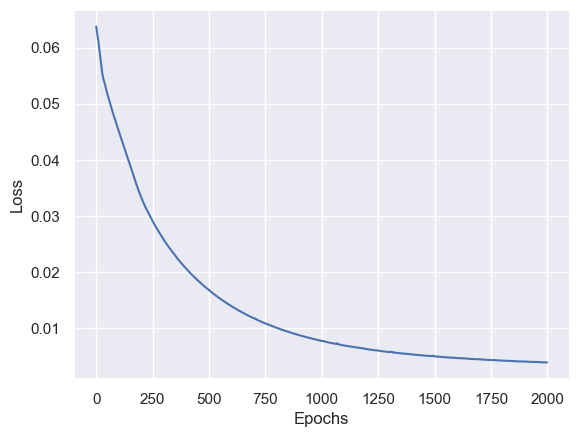

In [49]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

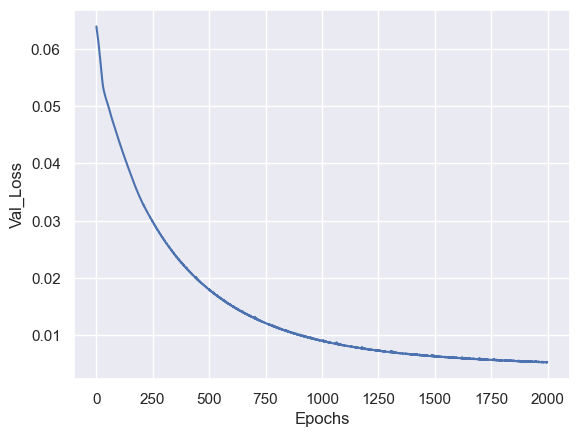

In [50]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [51]:
#modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Giants.h5


In [52]:
predCFE = modelCFE.predict(X_test)

10/10 [==============================] - 0s 11ms/step


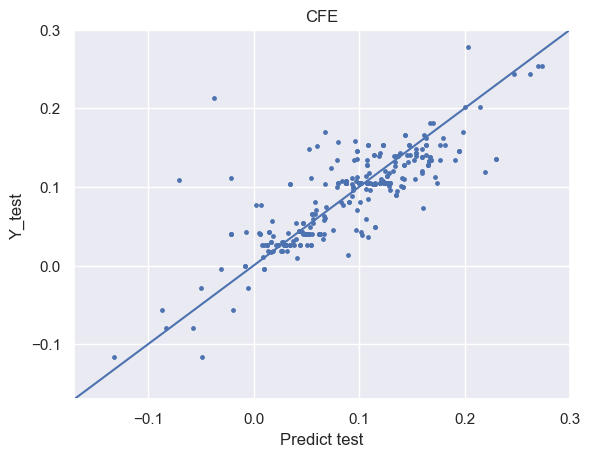

In [53]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [54]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [43]:
Y_test['CFE_predict'] = predCFE

In [44]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233  
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720  
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996  
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720  
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383  
...                               ...            ...          ...  
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641  
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957  
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390  
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384  
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377  

[299 rows x 12 columns]

In [45]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [55]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [56]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [57]:
modelCAFE = baseline_model_teste()

In [58]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
1/1 - 1s - loss: 0.0651 - val_loss: 0.0664 - 670ms/epoch - 670ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.0648 - val_loss: 0.0661 - 210ms/epoch - 210ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.0645 - val_loss: 0.0658 - 39ms/epoch - 39ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.0643 - val_loss: 0.0655 - 47ms/epoch - 47ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.0640 - val_loss: 0.0652 - 36ms/epoch - 36ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.0638 - val_loss: 0.0650 - 38ms/epoch - 38ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.0635 - val_loss: 0.0647 - 35ms/epoch - 35ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.0633 - val_loss: 0.0644 - 37ms/epoch - 37ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.0630 - val_loss: 0.0642 - 36ms/epoch - 36ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.0627 - val_loss: 0.0639 - 36ms/epoch - 36ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.0624 - val_loss: 0.0636 - 37ms/epoch - 37ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.0622 - val_loss: 0.0633 - 38ms/epoch - 38ms/step
Epoch 13/1200
1/1 - 0

Epoch 101/1200
1/1 - 0s - loss: 0.0434 - val_loss: 0.0435 - 40ms/epoch - 40ms/step
Epoch 102/1200
1/1 - 0s - loss: 0.0433 - val_loss: 0.0434 - 38ms/epoch - 38ms/step
Epoch 103/1200
1/1 - 0s - loss: 0.0432 - val_loss: 0.0433 - 41ms/epoch - 41ms/step
Epoch 104/1200
1/1 - 0s - loss: 0.0430 - val_loss: 0.0431 - 37ms/epoch - 37ms/step
Epoch 105/1200
1/1 - 0s - loss: 0.0429 - val_loss: 0.0430 - 43ms/epoch - 43ms/step
Epoch 106/1200
1/1 - 0s - loss: 0.0428 - val_loss: 0.0429 - 40ms/epoch - 40ms/step
Epoch 107/1200
1/1 - 0s - loss: 0.0426 - val_loss: 0.0428 - 37ms/epoch - 37ms/step
Epoch 108/1200
1/1 - 0s - loss: 0.0425 - val_loss: 0.0426 - 40ms/epoch - 40ms/step
Epoch 109/1200
1/1 - 0s - loss: 0.0424 - val_loss: 0.0425 - 40ms/epoch - 40ms/step
Epoch 110/1200
1/1 - 0s - loss: 0.0423 - val_loss: 0.0424 - 42ms/epoch - 42ms/step
Epoch 111/1200
1/1 - 0s - loss: 0.0421 - val_loss: 0.0423 - 43ms/epoch - 43ms/step
Epoch 112/1200
1/1 - 0s - loss: 0.0420 - val_loss: 0.0422 - 46ms/epoch - 46ms/step
Epoc

Epoch 200/1200
1/1 - 0s - loss: 0.0330 - val_loss: 0.0330 - 44ms/epoch - 44ms/step
Epoch 201/1200
1/1 - 0s - loss: 0.0330 - val_loss: 0.0329 - 45ms/epoch - 45ms/step
Epoch 202/1200
1/1 - 0s - loss: 0.0329 - val_loss: 0.0329 - 43ms/epoch - 43ms/step
Epoch 203/1200
1/1 - 0s - loss: 0.0328 - val_loss: 0.0328 - 39ms/epoch - 39ms/step
Epoch 204/1200
1/1 - 0s - loss: 0.0327 - val_loss: 0.0327 - 48ms/epoch - 48ms/step
Epoch 205/1200
1/1 - 0s - loss: 0.0326 - val_loss: 0.0326 - 45ms/epoch - 45ms/step
Epoch 206/1200
1/1 - 0s - loss: 0.0325 - val_loss: 0.0325 - 46ms/epoch - 46ms/step
Epoch 207/1200
1/1 - 0s - loss: 0.0324 - val_loss: 0.0324 - 45ms/epoch - 45ms/step
Epoch 208/1200
1/1 - 0s - loss: 0.0323 - val_loss: 0.0323 - 49ms/epoch - 49ms/step
Epoch 209/1200
1/1 - 0s - loss: 0.0323 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 210/1200
1/1 - 0s - loss: 0.0322 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 211/1200
1/1 - 0s - loss: 0.0321 - val_loss: 0.0321 - 45ms/epoch - 45ms/step
Epoc

Epoch 299/1200
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 44ms/epoch - 44ms/step
Epoch 300/1200
1/1 - 0s - loss: 0.0255 - val_loss: 0.0254 - 45ms/epoch - 45ms/step
Epoch 301/1200
1/1 - 0s - loss: 0.0254 - val_loss: 0.0254 - 43ms/epoch - 43ms/step
Epoch 302/1200
1/1 - 0s - loss: 0.0253 - val_loss: 0.0253 - 44ms/epoch - 44ms/step
Epoch 303/1200
1/1 - 0s - loss: 0.0253 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 304/1200
1/1 - 0s - loss: 0.0252 - val_loss: 0.0252 - 42ms/epoch - 42ms/step
Epoch 305/1200
1/1 - 0s - loss: 0.0251 - val_loss: 0.0251 - 42ms/epoch - 42ms/step
Epoch 306/1200
1/1 - 0s - loss: 0.0251 - val_loss: 0.0250 - 40ms/epoch - 40ms/step
Epoch 307/1200
1/1 - 0s - loss: 0.0250 - val_loss: 0.0250 - 43ms/epoch - 43ms/step
Epoch 308/1200
1/1 - 0s - loss: 0.0250 - val_loss: 0.0249 - 39ms/epoch - 39ms/step
Epoch 309/1200
1/1 - 0s - loss: 0.0249 - val_loss: 0.0248 - 40ms/epoch - 40ms/step
Epoch 310/1200
1/1 - 0s - loss: 0.0248 - val_loss: 0.0248 - 40ms/epoch - 40ms/step
Epoc

Epoch 398/1200
1/1 - 0s - loss: 0.0198 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 399/1200
1/1 - 0s - loss: 0.0198 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 400/1200
1/1 - 0s - loss: 0.0197 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 401/1200
1/1 - 0s - loss: 0.0197 - val_loss: 0.0197 - 40ms/epoch - 40ms/step
Epoch 402/1200
1/1 - 0s - loss: 0.0196 - val_loss: 0.0196 - 40ms/epoch - 40ms/step
Epoch 403/1200
1/1 - 0s - loss: 0.0196 - val_loss: 0.0196 - 55ms/epoch - 55ms/step
Epoch 404/1200
1/1 - 0s - loss: 0.0195 - val_loss: 0.0195 - 38ms/epoch - 38ms/step
Epoch 405/1200
1/1 - 0s - loss: 0.0195 - val_loss: 0.0195 - 37ms/epoch - 37ms/step
Epoch 406/1200
1/1 - 0s - loss: 0.0194 - val_loss: 0.0195 - 58ms/epoch - 58ms/step
Epoch 407/1200
1/1 - 0s - loss: 0.0194 - val_loss: 0.0194 - 39ms/epoch - 39ms/step
Epoch 408/1200
1/1 - 0s - loss: 0.0193 - val_loss: 0.0194 - 69ms/epoch - 69ms/step
Epoch 409/1200
1/1 - 0s - loss: 0.0193 - val_loss: 0.0193 - 43ms/epoch - 43ms/step
Epoc

Epoch 497/1200
1/1 - 0s - loss: 0.0155 - val_loss: 0.0156 - 44ms/epoch - 44ms/step
Epoch 498/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 499/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 42ms/epoch - 42ms/step
Epoch 500/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 501/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 49ms/epoch - 49ms/step
Epoch 502/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 56ms/epoch - 56ms/step
Epoch 503/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 49ms/epoch - 49ms/step
Epoch 504/1200
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 48ms/epoch - 48ms/step
Epoch 505/1200
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 48ms/epoch - 48ms/step
Epoch 506/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 507/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 50ms/epoch - 50ms/step
Epoch 508/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 46ms/epoch - 46ms/step
Epoc

Epoch 596/1200
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 43ms/epoch - 43ms/step
Epoch 597/1200
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 43ms/epoch - 43ms/step
Epoch 598/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0123 - 46ms/epoch - 46ms/step
Epoch 599/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 48ms/epoch - 48ms/step
Epoch 600/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 47ms/epoch - 47ms/step
Epoch 601/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 46ms/epoch - 46ms/step
Epoch 602/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 46ms/epoch - 46ms/step
Epoch 603/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 40ms/epoch - 40ms/step
Epoch 604/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 42ms/epoch - 42ms/step
Epoch 605/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 51ms/epoch - 51ms/step
Epoch 606/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoch 607/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 46ms/epoch - 46ms/step
Epoc

Epoch 695/1200
1/1 - 0s - loss: 0.0097 - val_loss: 0.0098 - 45ms/epoch - 45ms/step
Epoch 696/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 38ms/epoch - 38ms/step
Epoch 697/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 44ms/epoch - 44ms/step
Epoch 698/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 40ms/epoch - 40ms/step
Epoch 699/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 700/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 48ms/epoch - 48ms/step
Epoch 701/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 702/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 703/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 44ms/epoch - 44ms/step
Epoch 704/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 39ms/epoch - 39ms/step
Epoch 705/1200
1/1 - 0s - loss: 0.0094 - val_loss: 0.0096 - 37ms/epoch - 37ms/step
Epoch 706/1200
1/1 - 0s - loss: 0.0094 - val_loss: 0.0096 - 49ms/epoch - 49ms/step
Epoc

Epoch 794/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 42ms/epoch - 42ms/step
Epoch 795/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 796/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 49ms/epoch - 49ms/step
Epoch 797/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 40ms/epoch - 40ms/step
Epoch 798/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 41ms/epoch - 41ms/step
Epoch 799/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoch 800/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 55ms/epoch - 55ms/step
Epoch 801/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 802/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 803/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 42ms/epoch - 42ms/step
Epoch 804/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 45ms/epoch - 45ms/step
Epoch 805/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 46ms/epoch - 46ms/step
Epoc

Epoch 893/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 46ms/epoch - 46ms/step
Epoch 894/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 39ms/epoch - 39ms/step
Epoch 895/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 896/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 897/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 898/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 41ms/epoch - 41ms/step
Epoch 899/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 46ms/epoch - 46ms/step
Epoch 900/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 901/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 51ms/epoch - 51ms/step
Epoch 902/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 903/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 904/1200
1/1 - 0s - loss: 0.0061 - val_loss: 0.0064 - 50ms/epoch - 50ms/step
Epoc

Epoch 992/1200
1/1 - 0s - loss: 0.0052 - val_loss: 0.0054 - 48ms/epoch - 48ms/step
Epoch 993/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 994/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 995/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 996/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 997/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 998/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 999/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1000/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 50ms/epoch - 50ms/step
Epoch 1001/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 43ms/epoch - 43ms/step
Epoch 1002/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1003/1200
1/1 - 0s - loss: 0.0050 - val_loss: 0.0053 - 45ms/epoch - 45ms/step


Epoch 1090/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 45ms/epoch - 45ms/step
Epoch 1091/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 47ms/epoch - 47ms/step
Epoch 1092/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 47ms/epoch - 47ms/step
Epoch 1093/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 49ms/epoch - 49ms/step
Epoch 1094/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 40ms/epoch - 40ms/step
Epoch 1095/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 49ms/epoch - 49ms/step
Epoch 1096/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 44ms/epoch - 44ms/step
Epoch 1097/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43ms/step
Epoch 1098/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43ms/step
Epoch 1099/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 46ms/epoch - 46ms/step
Epoch 1100/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 50ms/epoch - 50ms/step
Epoch 1101/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43

Epoch 1188/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 34ms/epoch - 34ms/step
Epoch 1189/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1190/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1191/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1192/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1193/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 39ms/epoch - 39ms/step
Epoch 1194/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1195/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 38ms/epoch - 38ms/step
Epoch 1196/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 38ms/epoch - 38ms/step
Epoch 1197/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1198/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 37ms/epoch - 37ms/step
Epoch 1199/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36

Text(0, 0.5, 'Loss')

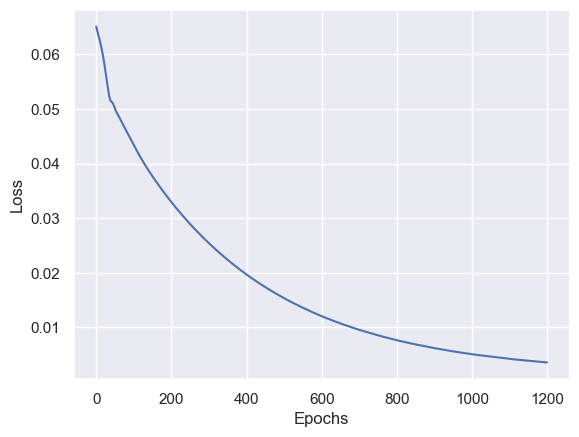

In [59]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

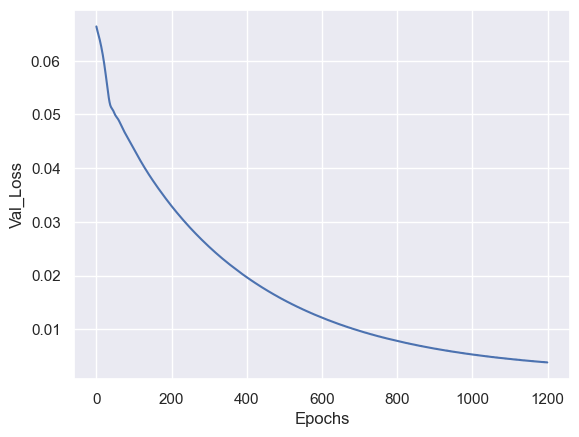

In [60]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [68]:
#modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Giants.h5


In [62]:
predCAFE = modelCAFE.predict(X_test)

10/10 [==============================] - 0s 7ms/step


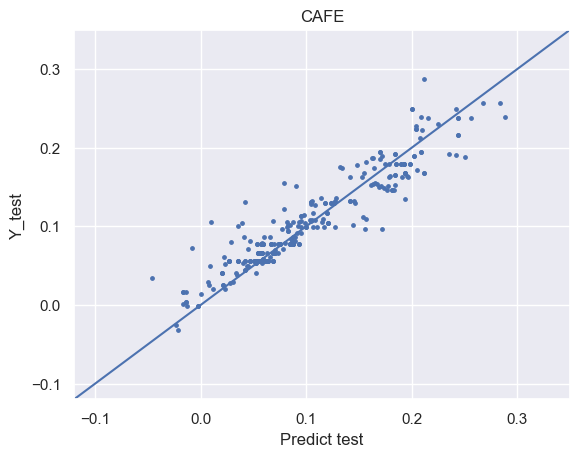

In [63]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [64]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [65]:
Y_test['CAFE_predict'] = predCAFE

In [66]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  
ID                                          
iDR4_3_SPLUS-n06s42_0022058       0.131211  
iDR4_3_STRIPE82-0028_0025061      0.077774  
iDR4_3_STRIPE82-0167_0033162      0.098913  
iDR4_3_STRIPE82-0028_0025061      0.077774  
iDR4_3_SPLUS-n07s41_0022767       0.081206  
...                                    ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544  
iDR4_3_STRIPE82-0026_0048087      0.104593  
iDR4_3_SPLUS-n02s44_0024688       0.136484  
iDR4_3_SPLUS-n07s41_0022767       0.081197  
iDR4_3_STRIPE82-0026_0047943      0.179703  

[299 rows x 13 columns]

In [67]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [69]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [70]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [71]:
modelNFE = baseline_model_teste()

In [72]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0590 - val_loss: 0.0600 - 597ms/epoch - 597ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0588 - val_loss: 0.0598 - 71ms/epoch - 71ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0586 - val_loss: 0.0597 - 65ms/epoch - 65ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0585 - val_loss: 0.0595 - 251ms/epoch - 251ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0593 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0592 - 36ms/epoch - 36ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0580 - val_loss: 0.0590 - 35ms/epoch - 35ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0578 - val_loss: 0.0588 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0587 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0585 - 36ms/epoch - 36ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0573 - val_loss: 0.0583 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0571 - val_loss: 0.0581 - 38ms/epoch - 38ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0434 - val_loss: 0.0451 - 40ms/epoch - 40ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0449 - 37ms/epoch - 37ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0448 - 41ms/epoch - 41ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0446 - 37ms/epoch - 37ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0428 - val_loss: 0.0445 - 87ms/epoch - 87ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0443 - 42ms/epoch - 42ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0426 - val_loss: 0.0442 - 74ms/epoch - 74ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0424 - val_loss: 0.0440 - 39ms/epoch - 39ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0439 - 69ms/epoch - 69ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0437 - 40ms/epoch - 40ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0436 - 69ms/epoch - 69ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0419 - val_loss: 0.0434 - 40ms/epoch - 40ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0334 - 43ms/epoch - 43ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0334 - 47ms/epoch - 47ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0332 - 52ms/epoch - 52ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0332 - 59ms/epoch - 59ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0331 - 55ms/epoch - 55ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0330 - 49ms/epoch - 49ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0329 - 44ms/epoch - 44ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0318 - val_loss: 0.0328 - 42ms/epoch - 42ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0316 - val_loss: 0.0326 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0315 - val_loss: 0.0326 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0314 - val_loss: 0.0325 - 47ms/epoch - 47ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0260 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0259 - 45ms/epoch - 45ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0258 - 48ms/epoch - 48ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0258 - 46ms/epoch - 46ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0257 - 42ms/epoch - 42ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0256 - 39ms/epoch - 39ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0256 - 44ms/epoch - 44ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0255 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0254 - 41ms/epoch - 41ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0254 - 41ms/epoch - 41ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0253 - 45ms/epoch - 45ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0253 - 45ms/epoch - 45ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0206 - 36ms/epoch - 36ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0206 - 37ms/epoch - 37ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0206 - 37ms/epoch - 37ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0205 - 36ms/epoch - 36ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0204 - 38ms/epoch - 38ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0204 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0201 - 36ms/epoch - 36ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 39ms/epoch - 39ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 39ms/epoch - 39ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 45ms/epoch - 45ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0165 - 41ms/epoch - 41ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0164 - 42ms/epoch - 42ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0139 - 47ms/epoch - 47ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0138 - 58ms/epoch - 58ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 46ms/epoch - 46ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 41ms/epoch - 41ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 46ms/epoch - 46ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0137 - 42ms/epoch - 42ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 43ms/epoch - 43ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 44ms/epoch - 44ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 47ms/epoch - 47ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0136 - 54ms/epoch - 54ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0136 - 45ms/epoch - 45ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0136 - 52ms/epoch - 52ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 41ms/epoch - 41ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 44ms/epoch - 44ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 40ms/epoch - 40ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 46ms/epoch - 46ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 44ms/epoch - 44ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 52ms/epoch - 52ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 50ms/epoch - 50ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 51ms/epoch - 51ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 43ms/epoch - 43ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 54ms/epoch - 54ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 45ms/epoch - 45ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 73ms/epoch - 73ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 61ms/epoch - 61ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 62ms/epoch - 62ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 51ms/epoch - 51ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 47ms/epoch - 47ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 45ms/epoch - 45ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 43ms/epoch - 43ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 49ms/epoch - 49ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 43ms/epoch - 43ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 44ms/epoch - 44ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 45ms/epoch - 45ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 39ms/epoch - 39ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 45ms/epoch - 45ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 39ms/epoch - 39ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 41ms/epoch - 41ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 44ms/epoch - 44ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 46ms/epoch - 46ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 41ms/epoch - 41ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 51ms/epoch - 51ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 47ms/epoch - 47ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 46ms/epoch - 46ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 46ms/epoch - 46ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0070 - 48ms/epoch - 48ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 56ms/epoch - 56ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 40ms/epoch - 40ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 47ms/epoch - 47ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 45ms/epoch - 45ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 41ms/epoch - 41ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43

Epoch 1188/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 69ms/epoch - 69ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 69ms/epoch - 69ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 68ms/epoch - 68ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 68ms/epoch - 68ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 69ms/epoch - 69ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 92ms/epoch - 92ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 44ms/epoch - 44

Epoch 1286/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 40ms/epoch - 40ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38

Epoch 1384/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 41ms/epoch - 41ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 40ms/epoch - 40ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 38ms/epoch - 38ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 41ms/epoch - 41ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 46ms/epoch - 46ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 40ms/epoch - 40ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 53ms/epoch - 53ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 49ms/epoch - 49ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 93ms/epoch - 93

Epoch 1482/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 40ms/epoch - 40ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 39ms/epoch - 39ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 41ms/epoch - 41ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 42ms/epoch - 42

Epoch 1580/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 42ms/epoch - 42ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 44ms/epoch - 44ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 41ms/epoch - 41ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 40ms/epoch - 40ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 38ms/epoch - 38ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 45ms/epoch - 45ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 41ms/epoch - 41ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 42ms/epoch - 42ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 45ms/epoch - 45ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 41ms/epoch - 41ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 44ms/epoch - 44

Epoch 1678/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 42ms/epoch - 42ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 38ms/epoch - 38ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 40ms/epoch - 40ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 47ms/epoch - 47ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 40ms/epoch - 40ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0049 - 38ms/epoch - 38

Epoch 1776/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 34ms/epoch - 34ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 34ms/epoch - 34ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 37ms/epoch - 37

Epoch 1874/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 39ms/epoch - 39ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 38ms/epoch - 38

Epoch 1972/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 50ms/epoch - 50ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 42ms/epoch - 42ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 45ms/epoch - 45ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 44ms/epoch - 44ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 46ms/epoch - 46ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 48ms/epoch - 48ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 44ms/epoch - 44ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 40ms/epoch - 40

Text(0, 0.5, 'Loss')

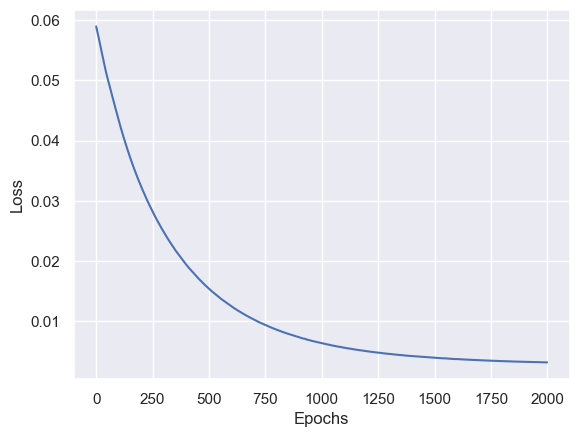

In [73]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

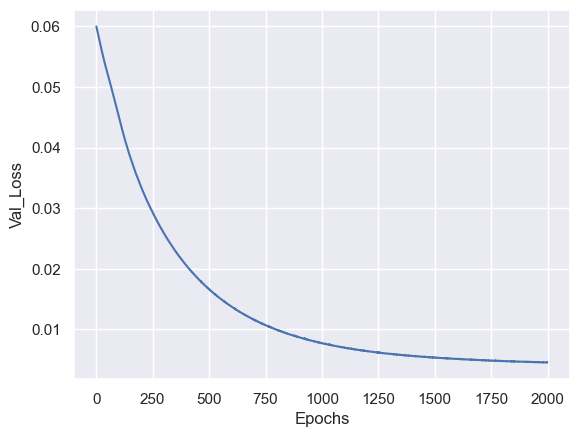

In [74]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [82]:
#modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Giants.h5


In [76]:
predNFE = modelNFE.predict(X_test)

10/10 [==============================] - 0s 13ms/step


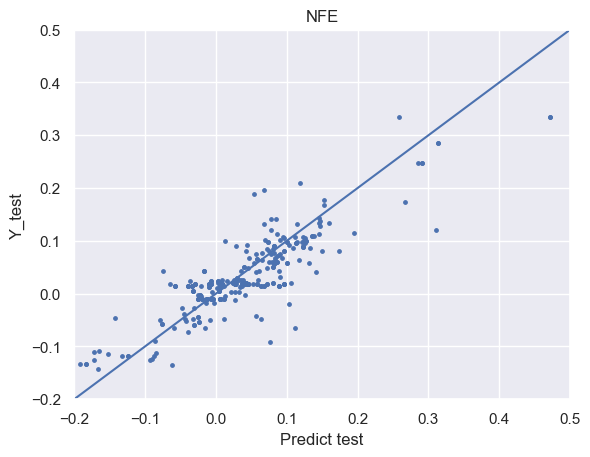

In [77]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [78]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 75.0%


In [79]:
Y_test['NFE_predict'] = predNFE

In [80]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333  
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333  
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893  
...                                    ...          ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245  
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421  
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320  
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870  
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349  

[299 rows x 14 columns]

In [81]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [83]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [84]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [85]:
modelMGFE = baseline_model_teste()

In [86]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0856 - val_loss: 0.0903 - 735ms/epoch - 735ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0850 - val_loss: 0.0897 - 252ms/epoch - 252ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0845 - val_loss: 0.0892 - 39ms/epoch - 39ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0840 - val_loss: 0.0887 - 35ms/epoch - 35ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0835 - val_loss: 0.0882 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0830 - val_loss: 0.0877 - 49ms/epoch - 49ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0826 - val_loss: 0.0872 - 48ms/epoch - 48ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0821 - val_loss: 0.0867 - 55ms/epoch - 55ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0861 - 42ms/epoch - 42ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0811 - val_loss: 0.0856 - 41ms/epoch - 41ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0806 - val_loss: 0.0850 - 36ms/epoch - 36ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0801 - val_loss: 0.0845 - 36ms/epoch - 36ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0500 - 41ms/epoch - 41ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0499 - 91ms/epoch - 91ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0490 - val_loss: 0.0497 - 40ms/epoch - 40ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0495 - 77ms/epoch - 77ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0494 - 43ms/epoch - 43ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0492 - 69ms/epoch - 69ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0491 - 42ms/epoch - 42ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0489 - 42ms/epoch - 42ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0487 - 43ms/epoch - 43ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0479 - val_loss: 0.0485 - 38ms/epoch - 38ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0478 - val_loss: 0.0484 - 47ms/epoch - 47ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0482 - 45ms/epoch - 45ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0368 - 40ms/epoch - 40ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0369 - val_loss: 0.0367 - 41ms/epoch - 41ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0369 - val_loss: 0.0366 - 42ms/epoch - 42ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0368 - val_loss: 0.0365 - 44ms/epoch - 44ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 42ms/epoch - 42ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0366 - val_loss: 0.0363 - 41ms/epoch - 41ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0362 - 41ms/epoch - 41ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 45ms/epoch - 45ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0360 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0359 - 44ms/epoch - 44ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0359 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0360 - val_loss: 0.0358 - 43ms/epoch - 43ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0292 - 37ms/epoch - 37ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0291 - 36ms/epoch - 36ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0291 - 35ms/epoch - 35ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0290 - 38ms/epoch - 38ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0289 - 35ms/epoch - 35ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0289 - 35ms/epoch - 35ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0288 - 35ms/epoch - 35ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0288 - 35ms/epoch - 35ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0287 - 37ms/epoch - 37ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0286 - 83ms/epoch - 83ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0286 - 36ms/epoch - 36ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0285 - 74ms/epoch - 74ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0235 - val_loss: 0.0238 - 45ms/epoch - 45ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0238 - 39ms/epoch - 39ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0237 - 38ms/epoch - 38ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0237 - 40ms/epoch - 40ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0236 - 39ms/epoch - 39ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0236 - 37ms/epoch - 37ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0235 - 39ms/epoch - 39ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0235 - 41ms/epoch - 41ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0234 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0234 - 43ms/epoch - 43ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0234 - 47ms/epoch - 47ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0233 - 41ms/epoch - 41ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0197 - 46ms/epoch - 46ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0196 - 50ms/epoch - 50ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0196 - 54ms/epoch - 54ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 45ms/epoch - 45ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0194 - 43ms/epoch - 43ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0194 - 46ms/epoch - 46ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0194 - 40ms/epoch - 40ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0194 - 49ms/epoch - 49ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0193 - 46ms/epoch - 46ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0193 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0165 - 46ms/epoch - 46ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0165 - 49ms/epoch - 49ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0164 - 46ms/epoch - 46ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0164 - 50ms/epoch - 50ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0163 - 46ms/epoch - 46ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 47ms/epoch - 47ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 46ms/epoch - 46ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0162 - 45ms/epoch - 45ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 43ms/epoch - 43ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0162 - 49ms/epoch - 49ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0140 - 41ms/epoch - 41ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0141 - 43ms/epoch - 43ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 45ms/epoch - 45ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0140 - 48ms/epoch - 48ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 45ms/epoch - 45ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 48ms/epoch - 48ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 44ms/epoch - 44ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 43ms/epoch - 43ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0139 - 39ms/epoch - 39ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0138 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0122 - 47ms/epoch - 47ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 45ms/epoch - 45ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 46ms/epoch - 46ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 46ms/epoch - 46ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 49ms/epoch - 49ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 44ms/epoch - 44ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0119 - 46ms/epoch - 46ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 42ms/epoch - 42ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 51ms/epoch - 51ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 47ms/epoch - 47ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 48ms/epoch - 48ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 45ms/epoch - 45ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 48ms/epoch - 48ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 45ms/epoch - 45ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0105 - 43ms/epoch - 43ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0096 - 41ms/epoch - 41ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 42ms/epoch - 42ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0096 - 41ms/epoch - 41ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 39ms/epoch - 39ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 40ms/epoch - 40ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 44ms/epoch - 44ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0094 - 39ms/epoch - 39ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 44ms/epoch - 44ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0094 - 40ms/epoch - 40ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 41ms/epoch - 41ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 53ms/epoch - 53ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 56ms/epoch - 56ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 45ms/epoch - 45ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 49ms/epoch - 49ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 53ms/epoch - 53ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0085 - 49ms/epoch - 49ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 51ms/epoch - 51

Epoch 1188/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 43ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 48ms/epoch - 48ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 57ms/epoch - 57ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 40ms/epoch - 40ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 43ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 41ms/epoch - 41ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 45ms/epoch - 45ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 51ms/epoch - 51ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 45ms/epoch - 45ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 50ms/epoch - 50

Epoch 1286/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 40ms/epoch - 40ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 48ms/epoch - 48ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 46ms/epoch - 46ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 45ms/epoch - 45ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 45ms/epoch - 45ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 46ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 47ms/epoch - 47ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 42ms/epoch - 42ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 40ms/epoch - 40ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 43ms/epoch - 43ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0073 - 41ms/epoch - 41

Epoch 1384/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 86ms/epoch - 86ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 123ms/epoch - 123ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 56ms/epoch - 56ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 46ms/epoch - 46ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 46ms/epoch - 46ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 45ms/epoch - 45ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 42ms/epoch - 42ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 55ms/epoch - 55ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 46ms/epoch - 46ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 44ms/epoch - 44ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 49ms/epoch - 

Epoch 1482/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0067 - 47ms/epoch - 47ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0065 - 47ms/epoch - 47ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 43ms/epoch - 43ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 50ms/epoch - 50ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 53ms/epoch - 53ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0067 - 46ms/epoch - 46ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 47ms/epoch - 47ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 45ms/epoch - 45ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 45ms/epoch - 45ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 47ms/epoch - 47ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 63ms/epoch - 63

Epoch 1580/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 69ms/epoch - 69ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 70ms/epoch - 70ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 45ms/epoch - 45ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 68ms/epoch - 68ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 47ms/epoch - 47ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 70ms/epoch - 70ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 46ms/epoch - 46ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 67ms/epoch - 67ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 48ms/epoch - 48ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 69ms/epoch - 69ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 40ms/epoch - 40

Epoch 1678/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 43ms/epoch - 43ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 40ms/epoch - 40ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 46ms/epoch - 46ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 48ms/epoch - 48ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 69ms/epoch - 69ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 46ms/epoch - 46ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 48ms/epoch - 48ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 47ms/epoch - 47ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 41ms/epoch - 41ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 43ms/epoch - 43

Epoch 1776/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 43ms/epoch - 43ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 40ms/epoch - 40ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 45ms/epoch - 45ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 86ms/epoch - 86

Epoch 1874/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 43ms/epoch - 43ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 40ms/epoch - 40ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43

Epoch 1972/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0056 - 52ms/epoch - 52ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 63ms/epoch - 63ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0056 - 102ms/epoch - 102ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 75ms/epoch - 75ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 40ms/epoch - 40ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 68ms/epoch - 68ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 69ms/epoch - 69ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 59ms/epoch - 59ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 

Text(0, 0.5, 'Loss')

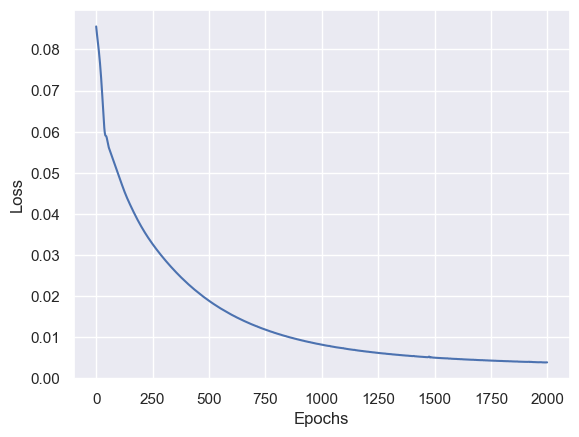

In [87]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

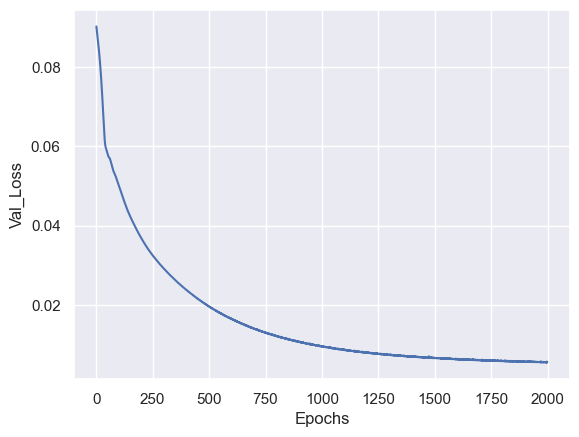

In [88]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [91]:
#modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Giants.h5


In [90]:
predMGFE = modelMGFE.predict(X_test)

10/10 [==============================] - 0s 5ms/step


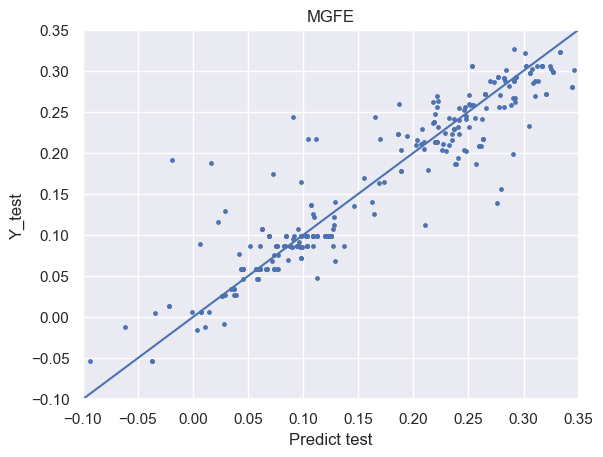

In [92]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [93]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 88.0%


In [94]:
Y_test['MGFE_predict'] = predMGFE

In [95]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571  
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571  
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959  
...                                    ...          ...           ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793  
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234  
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005  
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915  
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486  

[299 rows x 15 columns]

In [96]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [97]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [98]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [99]:
modelSIFE = baseline_model_teste()

In [100]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 1s - loss: 0.0659 - val_loss: 0.0671 - 570ms/epoch - 570ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.0656 - val_loss: 0.0667 - 190ms/epoch - 190ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0652 - val_loss: 0.0664 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0650 - val_loss: 0.0662 - 36ms/epoch - 36ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0647 - val_loss: 0.0659 - 37ms/epoch - 37ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0645 - val_loss: 0.0657 - 37ms/epoch - 37ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0642 - val_loss: 0.0654 - 35ms/epoch - 35ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0639 - val_loss: 0.0651 - 44ms/epoch - 44ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0637 - val_loss: 0.0648 - 35ms/epoch - 35ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0634 - val_loss: 0.0645 - 38ms/epoch - 38ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0631 - val_loss: 0.0642 - 36ms/epoch - 36ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0629 - val_loss: 0.0640 - 39ms/epoch - 39ms/step
Epoch 13/1500
1/1 - 0

Epoch 101/1500
1/1 - 0s - loss: 0.0453 - val_loss: 0.0453 - 41ms/epoch - 41ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0451 - val_loss: 0.0451 - 69ms/epoch - 69ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0449 - val_loss: 0.0449 - 48ms/epoch - 48ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0448 - val_loss: 0.0448 - 69ms/epoch - 69ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0446 - val_loss: 0.0446 - 40ms/epoch - 40ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0444 - val_loss: 0.0444 - 69ms/epoch - 69ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0443 - val_loss: 0.0443 - 39ms/epoch - 39ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0441 - val_loss: 0.0441 - 41ms/epoch - 41ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0439 - val_loss: 0.0439 - 47ms/epoch - 47ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0438 - val_loss: 0.0437 - 41ms/epoch - 41ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0436 - val_loss: 0.0435 - 58ms/epoch - 58ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0434 - val_loss: 0.0434 - 43ms/epoch - 43ms/step
Epoc

Epoch 200/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0330 - 42ms/epoch - 42ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0333 - val_loss: 0.0329 - 46ms/epoch - 46ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0332 - val_loss: 0.0328 - 43ms/epoch - 43ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0330 - val_loss: 0.0326 - 41ms/epoch - 41ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0329 - val_loss: 0.0325 - 41ms/epoch - 41ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0324 - 63ms/epoch - 63ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0327 - val_loss: 0.0323 - 47ms/epoch - 47ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0326 - val_loss: 0.0322 - 44ms/epoch - 44ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0325 - val_loss: 0.0321 - 44ms/epoch - 44ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0324 - val_loss: 0.0320 - 47ms/epoch - 47ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0258 - val_loss: 0.0255 - 41ms/epoch - 41ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0254 - 51ms/epoch - 51ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0254 - 51ms/epoch - 51ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0253 - 41ms/epoch - 41ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0251 - 52ms/epoch - 52ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0253 - val_loss: 0.0250 - 37ms/epoch - 37ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0252 - val_loss: 0.0250 - 45ms/epoch - 45ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0252 - val_loss: 0.0249 - 49ms/epoch - 49ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0251 - val_loss: 0.0249 - 50ms/epoch - 50ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0250 - val_loss: 0.0248 - 39ms/epoch - 39ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0199 - 42ms/epoch - 42ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0198 - 47ms/epoch - 47ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0197 - 44ms/epoch - 44ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0197 - 49ms/epoch - 49ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0197 - val_loss: 0.0196 - 44ms/epoch - 44ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0197 - val_loss: 0.0196 - 43ms/epoch - 43ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0196 - val_loss: 0.0195 - 51ms/epoch - 51ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0196 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0195 - val_loss: 0.0194 - 42ms/epoch - 42ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0194 - val_loss: 0.0194 - 47ms/epoch - 47ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0194 - val_loss: 0.0193 - 42ms/epoch - 42ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0156 - 51ms/epoch - 51ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0155 - 44ms/epoch - 44ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0154 - val_loss: 0.0154 - 45ms/epoch - 45ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 42ms/epoch - 42ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 43ms/epoch - 43ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 45ms/epoch - 45ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 45ms/epoch - 45ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 52ms/epoch - 52ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0152 - 43ms/epoch - 43ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 42ms/epoch - 42ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 48ms/epoch - 48ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0123 - 46ms/epoch - 46ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 41ms/epoch - 41ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 39ms/epoch - 39ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 43ms/epoch - 43ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 43ms/epoch - 43ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 55ms/epoch - 55ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 40ms/epoch - 40ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0097 - val_loss: 0.0099 - 40ms/epoch - 40ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0097 - val_loss: 0.0099 - 40ms/epoch - 40ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0099 - 44ms/epoch - 44ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 48ms/epoch - 48ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 40ms/epoch - 40ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 50ms/epoch - 50ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 44ms/epoch - 44ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0080 - 41ms/epoch - 41ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0080 - 46ms/epoch - 46ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 45ms/epoch - 45ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 43ms/epoch - 43ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 39ms/epoch - 39ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 47ms/epoch - 47ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 43ms/epoch - 43ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 41ms/epoch - 41ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 46ms/epoch - 46ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 47ms/epoch - 47ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 44ms/epoch - 44ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 42ms/epoch - 42ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 38ms/epoch - 38ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 41ms/epoch - 41ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 48ms/epoch - 48ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 56ms/epoch - 56ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0066 - 42ms/epoch - 42ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 46ms/epoch - 46ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0056 - 47ms/epoch - 47ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 40ms/epoch - 40ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 52ms/epoch - 52ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 47ms/epoch - 47ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 51ms/epoch - 51ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 60ms/epoch - 60ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 70ms/epoch - 70ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0051 - val_loss: 0.0055 - 61ms/epoch - 61ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0048 - 56ms/epoch - 56ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 54ms/epoch - 54ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0048 - 56ms/epoch - 56ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 37ms/epoch - 37ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 39ms/epoch - 39ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 40ms/epoch - 40

Epoch 1188/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0041 - 46ms/epoch - 46ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0041 - 39ms/epoch - 39ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 43ms/epoch - 43ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 43ms/epoch - 43ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 45ms/epoch - 45ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 46ms/epoch - 46ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 47ms/epoch - 47ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 45ms/epoch - 45ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41

Epoch 1286/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0037 - 40ms/epoch - 40ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0036 - 43ms/epoch - 43ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0037 - 39ms/epoch - 39ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0036 - 42ms/epoch - 42ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 47ms/epoch - 47ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 43ms/epoch - 43ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 53ms/epoch - 53ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 44ms/epoch - 44ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 41ms/epoch - 41ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 50ms/epoch - 50ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 42ms/epoch - 42ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 40ms/epoch - 40

Epoch 1384/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 69ms/epoch - 69ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 44ms/epoch - 44ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 48ms/epoch - 48ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 47ms/epoch - 47ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 70ms/epoch - 70ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 41ms/epoch - 41ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 69ms/epoch - 69ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 48ms/epoch - 48ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 52ms/epoch - 52

Epoch 1482/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 43ms/epoch - 43ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 44ms/epoch - 44ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 39ms/epoch - 39ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 40ms/epoch - 40ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 41ms/epoch - 41ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 40ms/epoch - 40ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 46ms/epoch - 46ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 39ms/epoch - 39

Text(0, 0.5, 'Loss')

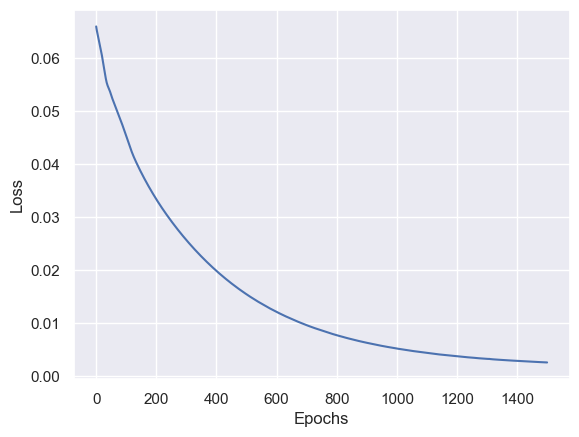

In [101]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

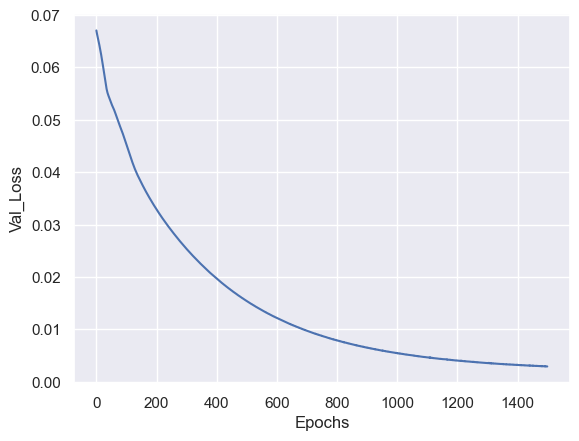

In [102]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [110]:
#modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Giants.h5


In [104]:
predSIFE = modelSIFE.predict(X_test)

10/10 [==============================] - 0s 3ms/step


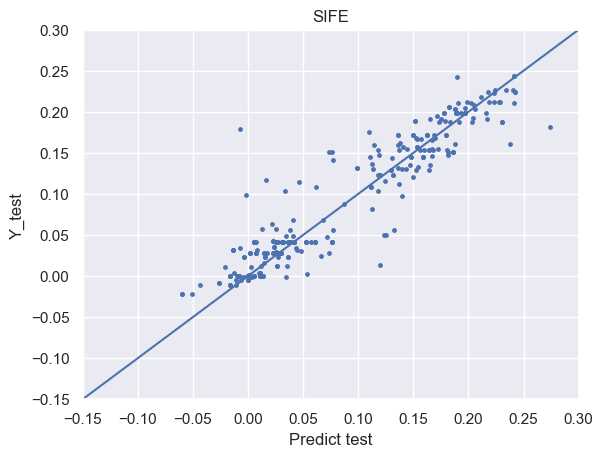

In [105]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [106]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 89.0%


In [107]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [108]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959   
...                                    ...          ...           ...   
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793   
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234   
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005   
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915   
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486   

                              SIFE_predict  
ID                                          
iDR4_3_SPLUS-n06s42_0022058       0.189094  
iDR4_3_STRIPE82-0028_0025061      0.027876  
iDR4_3_STRIPE82-0167_0033162      0.1

In [109]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [111]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [112]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [113]:
modelNIFE = baseline_model_teste()

In [114]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0546 - val_loss: 0.0549 - 557ms/epoch - 557ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0547 - 40ms/epoch - 40ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0545 - 39ms/epoch - 39ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0540 - val_loss: 0.0542 - 36ms/epoch - 36ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0540 - 35ms/epoch - 35ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0538 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0536 - 36ms/epoch - 36ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0534 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0531 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0529 - 39ms/epoch - 39ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0527 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0525 - 39ms/epoch - 39ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0400 - 39ms/epoch - 39ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0399 - 42ms/epoch - 42ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0398 - 38ms/epoch - 38ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0397 - 47ms/epoch - 47ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0396 - val_loss: 0.0396 - 45ms/epoch - 45ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0395 - val_loss: 0.0395 - 47ms/epoch - 47ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0394 - val_loss: 0.0393 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0392 - 49ms/epoch - 49ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0391 - 41ms/epoch - 41ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0389 - 42ms/epoch - 42ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0388 - 44ms/epoch - 44ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0303 - val_loss: 0.0302 - 42ms/epoch - 42ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0302 - val_loss: 0.0301 - 41ms/epoch - 41ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0300 - 48ms/epoch - 48ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0300 - 41ms/epoch - 41ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0299 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0298 - 42ms/epoch - 42ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0297 - 47ms/epoch - 47ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0296 - 42ms/epoch - 42ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0295 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0294 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0294 - 45ms/epoch - 45ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0293 - 39ms/epoch - 39ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0228 - 43ms/epoch - 43ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0227 - val_loss: 0.0227 - 40ms/epoch - 40ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0227 - val_loss: 0.0227 - 46ms/epoch - 46ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0226 - val_loss: 0.0226 - 42ms/epoch - 42ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0225 - val_loss: 0.0225 - 41ms/epoch - 41ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0225 - val_loss: 0.0225 - 40ms/epoch - 40ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0224 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0224 - val_loss: 0.0223 - 42ms/epoch - 42ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0223 - val_loss: 0.0223 - 47ms/epoch - 47ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0222 - val_loss: 0.0222 - 42ms/epoch - 42ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0222 - val_loss: 0.0221 - 42ms/epoch - 42ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0221 - val_loss: 0.0221 - 43ms/epoch - 43ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0172 - val_loss: 0.0172 - 52ms/epoch - 52ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0170 - 43ms/epoch - 43ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0169 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0169 - 43ms/epoch - 43ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0169 - 48ms/epoch - 48ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 44ms/epoch - 44ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 40ms/epoch - 40ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 47ms/epoch - 47ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0129 - 44ms/epoch - 44ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0129 - 43ms/epoch - 43ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0129 - 41ms/epoch - 41ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0128 - 45ms/epoch - 45ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0128 - 41ms/epoch - 41ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 41ms/epoch - 41ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0127 - 46ms/epoch - 46ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0127 - 47ms/epoch - 47ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0127 - 48ms/epoch - 48ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0126 - 43ms/epoch - 43ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0099 - 60ms/epoch - 60ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 41ms/epoch - 41ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 43ms/epoch - 43ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 49ms/epoch - 49ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0098 - 45ms/epoch - 45ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0097 - 48ms/epoch - 48ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 41ms/epoch - 41ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0096 - 45ms/epoch - 45ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0096 - 47ms/epoch - 47ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0096 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0075 - val_loss: 0.0075 - 69ms/epoch - 69ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 91ms/epoch - 91ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 43ms/epoch - 43ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 39ms/epoch - 39ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0074 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0074 - 41ms/epoch - 41ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 58ms/epoch - 58ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 44ms/epoch - 44ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 103ms/epoch - 103ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0073 - 41ms/epoch - 41ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0073 - 59ms/epoch - 59ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0072 - val_loss: 0.0073 - 52ms/epoch - 52ms/step
Ep

Epoch 794/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0058 - 40ms/epoch - 40ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0058 - 41ms/epoch - 41ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0057 - 51ms/epoch - 51ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0057 - 46ms/epoch - 46ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 38ms/epoch - 38ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 47ms/epoch - 47ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0056 - 39ms/epoch - 39ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 70ms/epoch - 70ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 40ms/epoch - 40ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 71ms/epoch - 71ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 46ms/epoch - 46ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 45ms/epoch - 45ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 46ms/epoch - 46ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0043 - 40ms/epoch - 40ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0043 - 70ms/epoch - 70ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0043 - 47ms/epoch - 47ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 42ms/epoch - 42ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 44ms/epoch - 44ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 43ms/epoch - 43ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0034 - 44ms/epoch - 44ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 42ms/epoch - 42ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 43ms/epoch - 43ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 45ms/epoch - 45ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 44ms/epoch - 44ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 39ms/epoch - 39ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0027 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 46ms/epoch - 46ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 40ms/epoch - 40ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 48ms/epoch - 48ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 39ms/epoch - 39ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43

Epoch 1188/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 42ms/epoch - 42ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 44ms/epoch - 44ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 43ms/epoch - 43ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 38ms/epoch - 38ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 39ms/epoch - 39ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 41ms/epoch - 41ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0021 - 40ms/epoch - 40

Epoch 1286/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 46ms/epoch - 46ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 43ms/epoch - 43ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 45ms/epoch - 45ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 42ms/epoch - 42ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 39ms/epoch - 39ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 44ms/epoch - 44ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 43ms/epoch - 43ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 40ms/epoch - 40ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 45ms/epoch - 45ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 51ms/epoch - 51ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 44ms/epoch - 44ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 42ms/epoch - 42

Epoch 1384/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 42ms/epoch - 42ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 46ms/epoch - 46ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 44ms/epoch - 44ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 42ms/epoch - 42ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 41ms/epoch - 41ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43

Epoch 1482/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 46ms/epoch - 46ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 45ms/epoch - 45ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 46ms/epoch - 46ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 45ms/epoch - 45ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 40ms/epoch - 40ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0012 - 42ms/epoch - 42ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0011 - val_loss: 0.0012 - 43ms/epoch - 43

Epoch 1580/2000
1/1 - 0s - loss: 0.0010 - val_loss: 0.0011 - 38ms/epoch - 38ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0010 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1582/2000
1/1 - 0s - loss: 9.9893e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1583/2000
1/1 - 0s - loss: 9.9744e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1584/2000
1/1 - 0s - loss: 9.9602e-04 - val_loss: 0.0011 - 39ms/epoch - 39ms/step
Epoch 1585/2000
1/1 - 0s - loss: 9.9469e-04 - val_loss: 0.0011 - 37ms/epoch - 37ms/step
Epoch 1586/2000
1/1 - 0s - loss: 9.9334e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1587/2000
1/1 - 0s - loss: 9.9224e-04 - val_loss: 0.0011 - 37ms/epoch - 37ms/step
Epoch 1588/2000
1/1 - 0s - loss: 9.9103e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1589/2000
1/1 - 0s - loss: 9.8998e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1590/2000
1/1 - 0s - loss: 9.8832e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1591/2000
1/1 - 0s - loss: 9.8675e

Epoch 1673/2000
1/1 - 0s - loss: 8.8286e-04 - val_loss: 9.8306e-04 - 39ms/epoch - 39ms/step
Epoch 1674/2000
1/1 - 0s - loss: 8.8177e-04 - val_loss: 9.8447e-04 - 40ms/epoch - 40ms/step
Epoch 1675/2000
1/1 - 0s - loss: 8.8084e-04 - val_loss: 9.8095e-04 - 39ms/epoch - 39ms/step
Epoch 1676/2000
1/1 - 0s - loss: 8.7960e-04 - val_loss: 9.8203e-04 - 42ms/epoch - 42ms/step
Epoch 1677/2000
1/1 - 0s - loss: 8.7842e-04 - val_loss: 9.7906e-04 - 41ms/epoch - 41ms/step
Epoch 1678/2000
1/1 - 0s - loss: 8.7710e-04 - val_loss: 9.7894e-04 - 41ms/epoch - 41ms/step
Epoch 1679/2000
1/1 - 0s - loss: 8.7583e-04 - val_loss: 9.7717e-04 - 44ms/epoch - 44ms/step
Epoch 1680/2000
1/1 - 0s - loss: 8.7469e-04 - val_loss: 9.7584e-04 - 40ms/epoch - 40ms/step
Epoch 1681/2000
1/1 - 0s - loss: 8.7360e-04 - val_loss: 9.7574e-04 - 63ms/epoch - 63ms/step
Epoch 1682/2000
1/1 - 0s - loss: 8.7265e-04 - val_loss: 9.7333e-04 - 55ms/epoch - 55ms/step
Epoch 1683/2000
1/1 - 0s - loss: 8.7172e-04 - val_loss: 9.7439e-04 - 52ms/epoch 

1/1 - 0s - loss: 7.9578e-04 - val_loss: 8.9785e-04 - 44ms/epoch - 44ms/step
Epoch 1763/2000
1/1 - 0s - loss: 7.9504e-04 - val_loss: 8.9872e-04 - 44ms/epoch - 44ms/step
Epoch 1764/2000
1/1 - 0s - loss: 7.9431e-04 - val_loss: 8.9627e-04 - 108ms/epoch - 108ms/step
Epoch 1765/2000
1/1 - 0s - loss: 7.9349e-04 - val_loss: 8.9741e-04 - 48ms/epoch - 48ms/step
Epoch 1766/2000
1/1 - 0s - loss: 7.9268e-04 - val_loss: 8.9456e-04 - 74ms/epoch - 74ms/step
Epoch 1767/2000
1/1 - 0s - loss: 7.9179e-04 - val_loss: 8.9540e-04 - 45ms/epoch - 45ms/step
Epoch 1768/2000
1/1 - 0s - loss: 7.9081e-04 - val_loss: 8.9327e-04 - 70ms/epoch - 70ms/step
Epoch 1769/2000
1/1 - 0s - loss: 7.8985e-04 - val_loss: 8.9290e-04 - 41ms/epoch - 41ms/step
Epoch 1770/2000
1/1 - 0s - loss: 7.8897e-04 - val_loss: 8.9216e-04 - 69ms/epoch - 69ms/step
Epoch 1771/2000
1/1 - 0s - loss: 7.8813e-04 - val_loss: 8.9092e-04 - 44ms/epoch - 44ms/step
Epoch 1772/2000
1/1 - 0s - loss: 7.8736e-04 - val_loss: 8.9097e-04 - 69ms/epoch - 69ms/step
Ep

Epoch 1852/2000
1/1 - 0s - loss: 7.2915e-04 - val_loss: 8.3260e-04 - 49ms/epoch - 49ms/step
Epoch 1853/2000
1/1 - 0s - loss: 7.2875e-04 - val_loss: 8.3517e-04 - 46ms/epoch - 46ms/step
Epoch 1854/2000
1/1 - 0s - loss: 7.2831e-04 - val_loss: 8.3154e-04 - 44ms/epoch - 44ms/step
Epoch 1855/2000
1/1 - 0s - loss: 7.2760e-04 - val_loss: 8.3367e-04 - 44ms/epoch - 44ms/step
Epoch 1856/2000
1/1 - 0s - loss: 7.2689e-04 - val_loss: 8.3008e-04 - 44ms/epoch - 44ms/step
Epoch 1857/2000
1/1 - 0s - loss: 7.2597e-04 - val_loss: 8.3094e-04 - 42ms/epoch - 42ms/step
Epoch 1858/2000
1/1 - 0s - loss: 7.2507e-04 - val_loss: 8.2925e-04 - 45ms/epoch - 45ms/step
Epoch 1859/2000
1/1 - 0s - loss: 7.2425e-04 - val_loss: 8.2851e-04 - 41ms/epoch - 41ms/step
Epoch 1860/2000
1/1 - 0s - loss: 7.2362e-04 - val_loss: 8.2893e-04 - 41ms/epoch - 41ms/step
Epoch 1861/2000
1/1 - 0s - loss: 7.2311e-04 - val_loss: 8.2709e-04 - 42ms/epoch - 42ms/step
Epoch 1862/2000
1/1 - 0s - loss: 7.2260e-04 - val_loss: 8.2866e-04 - 49ms/epoch 

1/1 - 0s - loss: 6.7840e-04 - val_loss: 7.8485e-04 - 41ms/epoch - 41ms/step
Epoch 1942/2000
1/1 - 0s - loss: 6.7775e-04 - val_loss: 7.8335e-04 - 42ms/epoch - 42ms/step
Epoch 1943/2000
1/1 - 0s - loss: 6.7716e-04 - val_loss: 7.8286e-04 - 41ms/epoch - 41ms/step
Epoch 1944/2000
1/1 - 0s - loss: 6.7662e-04 - val_loss: 7.8299e-04 - 42ms/epoch - 42ms/step
Epoch 1945/2000
1/1 - 0s - loss: 6.7619e-04 - val_loss: 7.8168e-04 - 41ms/epoch - 41ms/step
Epoch 1946/2000
1/1 - 0s - loss: 6.7580e-04 - val_loss: 7.8305e-04 - 44ms/epoch - 44ms/step
Epoch 1947/2000
1/1 - 0s - loss: 6.7547e-04 - val_loss: 7.8080e-04 - 41ms/epoch - 41ms/step
Epoch 1948/2000
1/1 - 0s - loss: 6.7514e-04 - val_loss: 7.8282e-04 - 43ms/epoch - 43ms/step
Epoch 1949/2000
1/1 - 0s - loss: 6.7491e-04 - val_loss: 7.7980e-04 - 43ms/epoch - 43ms/step
Epoch 1950/2000
1/1 - 0s - loss: 6.7450e-04 - val_loss: 7.8217e-04 - 66ms/epoch - 66ms/step
Epoch 1951/2000
1/1 - 0s - loss: 6.7414e-04 - val_loss: 7.7880e-04 - 40ms/epoch - 40ms/step
Epoc

Text(0, 0.5, 'Loss')

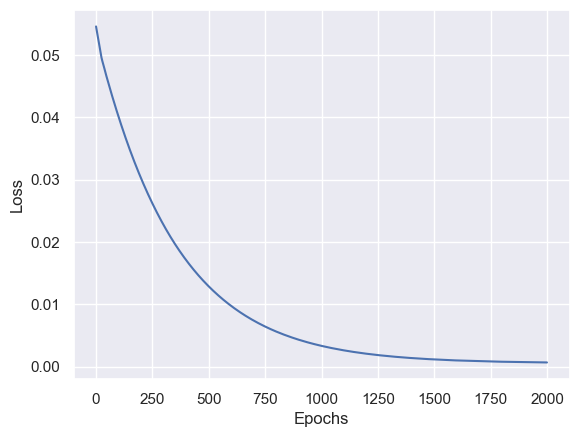

In [115]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

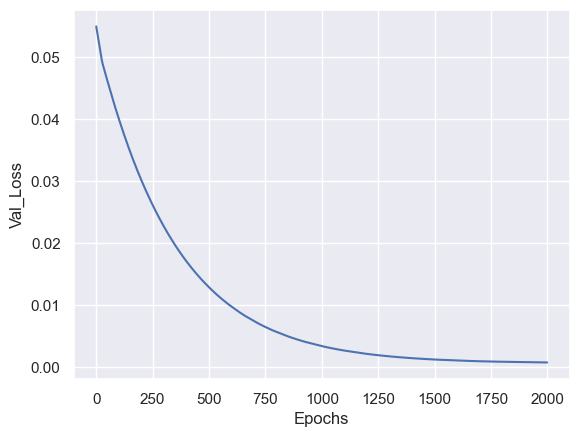

In [116]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [119]:
#modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Giants.h5


In [118]:
predNIFE = modelNIFE.predict(X_test)

10/10 [==============================] - 0s 12ms/step


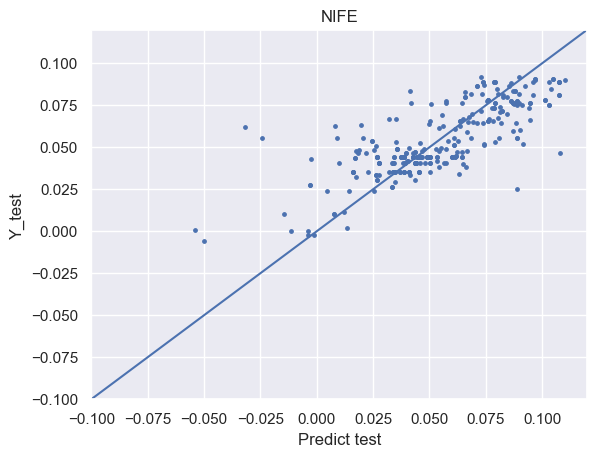

In [120]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [121]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 61.0%


In [122]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [123]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959   
...                                    ...          ...           ...   
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793   
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234   
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005   
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915   
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-n06s42_0022058       0.189094      0.086175  
iDR4_3_STRIPE82-0028_0025061      0.0278

In [124]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")